### Bankruptcy Prediction - Using data from the Taiwan Economic Journal for the years 1999–2009

Source:
Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

##### Importing required Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('bankrupcy_data.csv')

In [3]:
df.shape

(6819, 96)

In [4]:
df.head(15)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0           1                                           0.370594          
1           1                                           0.464291          
2           1                                           0.426071          
3           1                                           0.399844          
4           1                                           0.465022          
5           1                                           0.388680          
6           0                                           0.390923          
7           0                                           0.508361          
8           0                                           0.488519          
9           0                                           0.495686          
10          0                                           0.482475          
11          0                                           0.444401          
12          0                                           0.491152          
13          0                                           0.474041          
14          0                                           0.506703          

     ROA(A) before interest and % after tax  \
0                                  0.424389   
1                                  0.538214   
2                                  0.499019   
3                                  0.451265   
4                                  0.538432   
5                                  0.415177   
6                                  0.445704   
7                                  0.570922   
8                                  0.545137   
9                                  0.550916   
10                                 0.567543   
11                                 0.549717   
12                                 0.551570   
13                                 0.533308   
14                                 0.575829   

     ROA(B) before interest and depreciation after tax  \
0                                            0.405750    
1                                            0.516730    
2                                            0.472295    
3                                            0.457733    
4                                            0.522298    
5                                            0.419134    
6                                            0.436158    
7                                            0.559077    
8                                            0.543284    
9                                            0.542963    
10                                           0.538198    
11                                           0.498956    
12                                           0.543391    
13                                           0.523690    
14                                           0.569838    

     Operating Gross Margin   Realized Sales Gross Margin  \
0                  0.601457                      0.601457   
1                  0.610235                      0.610235   
2                  0.601450                      0.601364   
3                  0.583541                      0.583541   
4                  0.598783                      0.598783   
5                  0.590171                      0.590251   
6                  0.619950                      0.619950   
7                  0.601738                      0.601717   
8                  0.603612                      0.603612   
9                  0.599209                      0.599209   
10                 0.614026                      0.614026   
11                 0.623712                      0.623712   
12                 0.608131                      0.608138   
13                 0.600578                      0.600578   
14                 0.604686                      0.604686   

     Operating Profit Rate   Pre-tax net Interest Rate  \
0                 0.998969                    0.796887   
1                 0.998946  

In [5]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [7]:
data_types = df.dtypes

categorical_columns = data_types[data_types == 'object'].index.tolist()
numerical_columns = data_types[data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
[]

Numerical Columns:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit G

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### Summary Statistics:

In [9]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

By looking at the summary it seems like the data is already scaled, the minimum values are 0s' and maximum values are 1s'.

#### Checking for unique values in the columns

In [10]:
{column : len(df[column].unique())for column in df.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

The "Net Income Flag" column have only 1 unique value that is not going to give any info to my model so I am removing the column for further analysis.

In [11]:
df = df.drop(' Net Income Flag', axis= 1)

The column ' Liability-Assets Flag' is having 2 unique values, so it can be a categorical column.

In [12]:
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

Now we can confirm that this is a categorical column, which is encoded already.

In [13]:
df.head(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

#### Class Distribution:

In [14]:
class_distribution = df['Bankrupt?'].value_counts()
print(class_distribution)

0    6599
1     220
Name: Bankrupt?, dtype: int64


The target variable is imbalanced

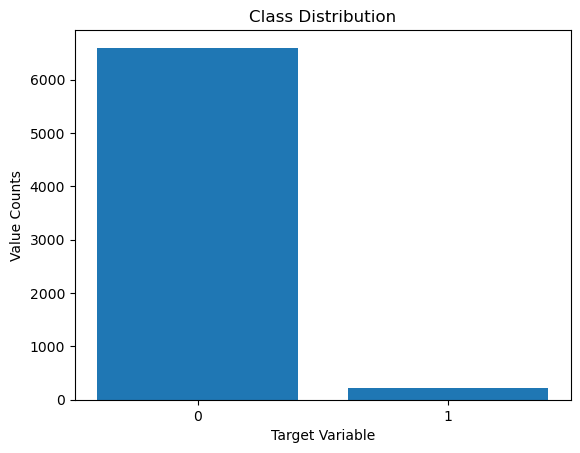

In [15]:
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Target Variable")
plt.ylabel("Value Counts")
plt.title("Class Distribution")
plt.xticks(class_distribution.index, [0, 1])
plt.show()

### Data Visualization

Categorical Features:

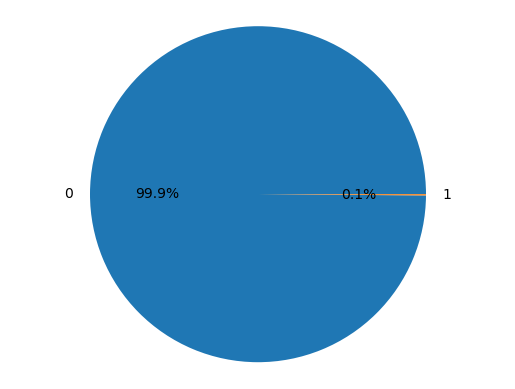

In [16]:
category_counts = df[' Liability-Assets Flag'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Histograms for Numerical Features:

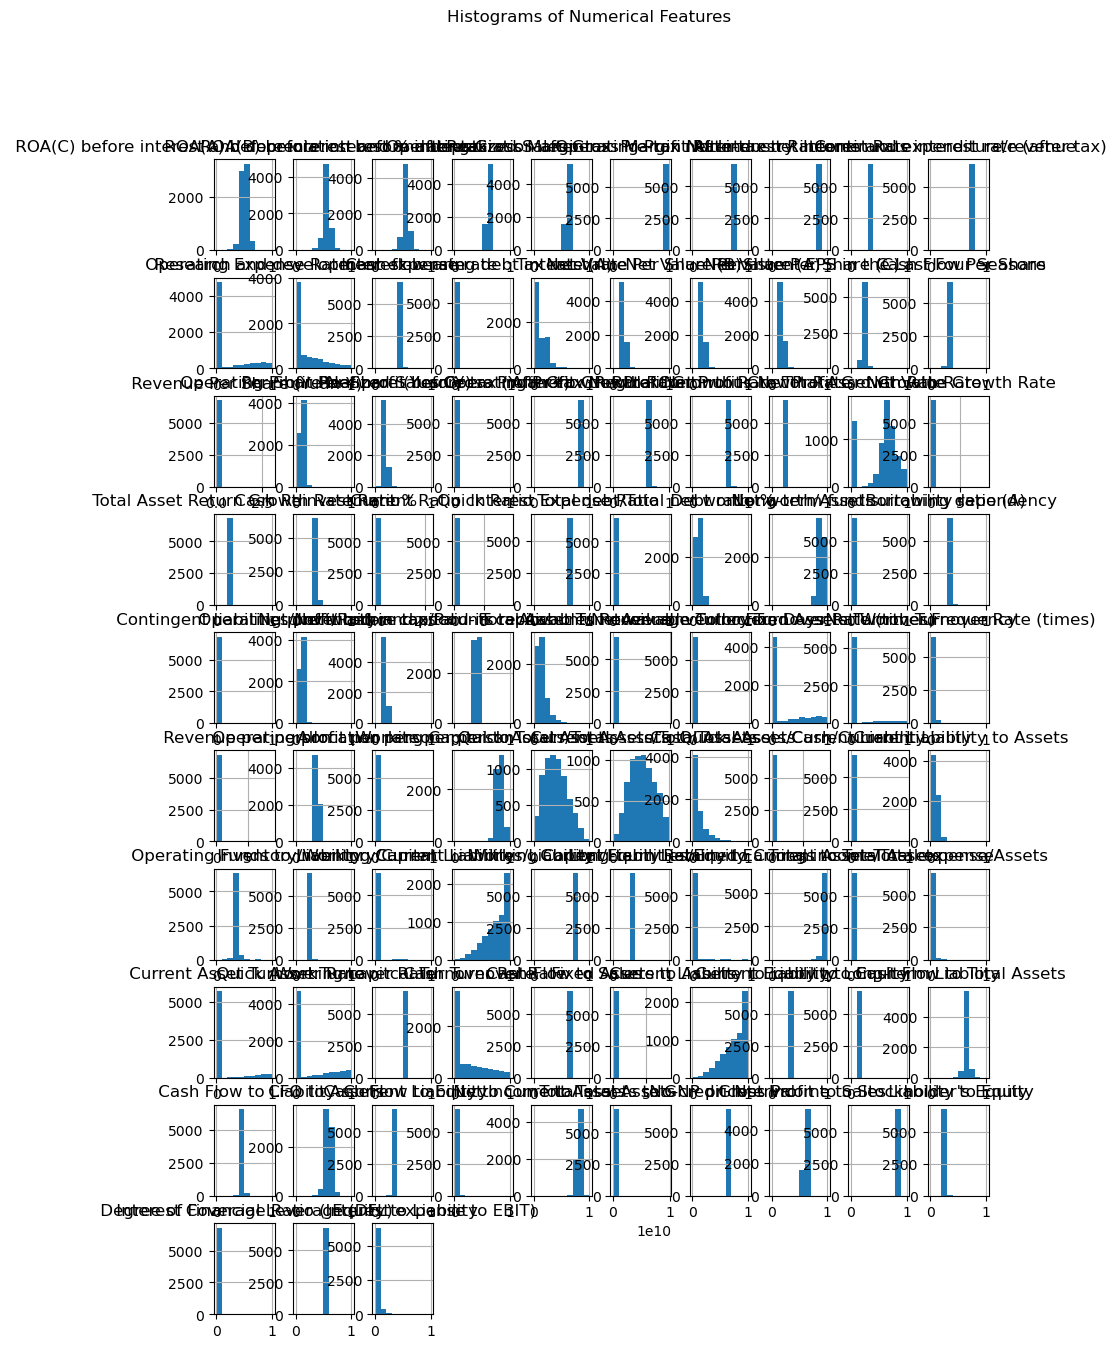

In [17]:
numerical_features = df.drop(columns=['Bankrupt?', ' Liability-Assets Flag'])

# Ploting histograms for numerical features
numerical_features.hist(figsize=(10, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

Need to go for a better plot

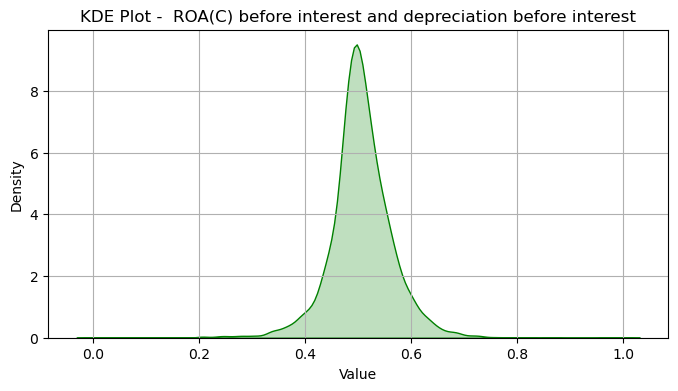

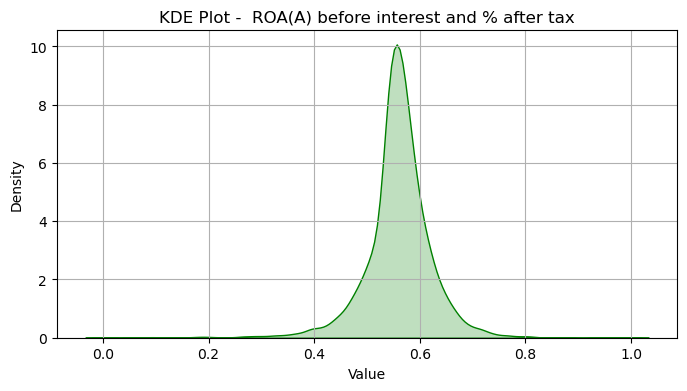

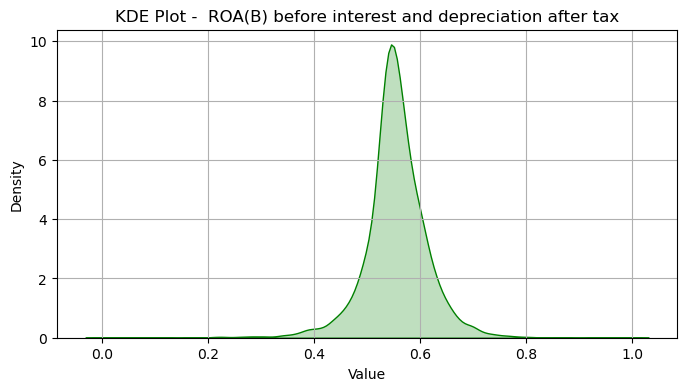

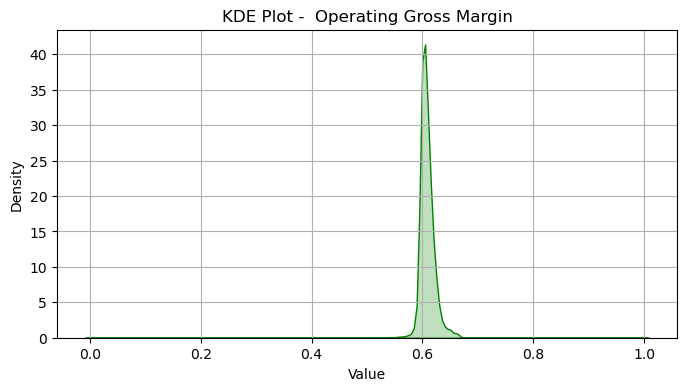

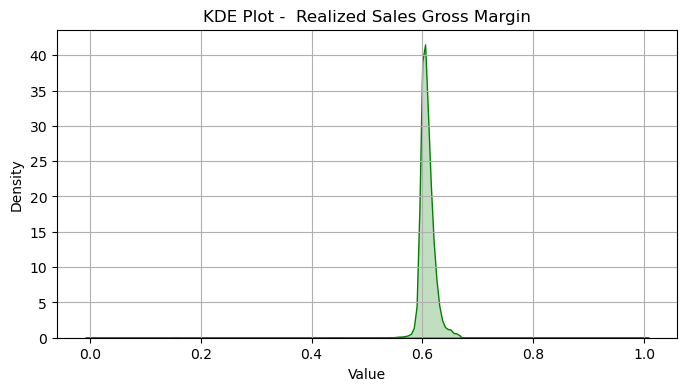

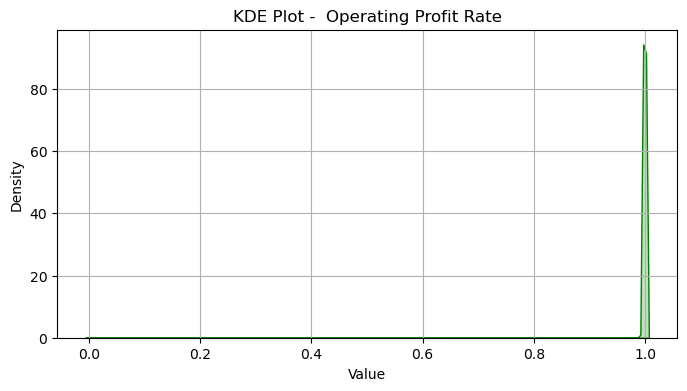

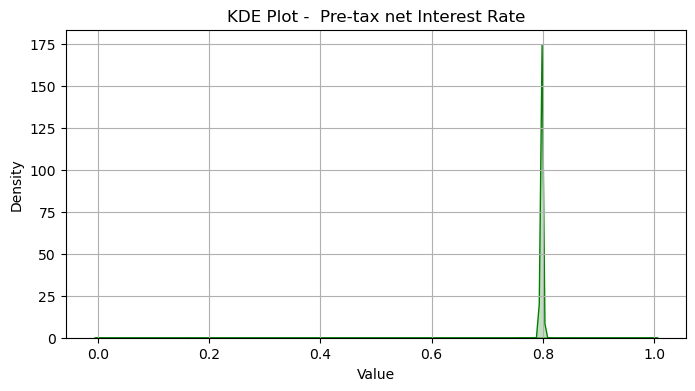

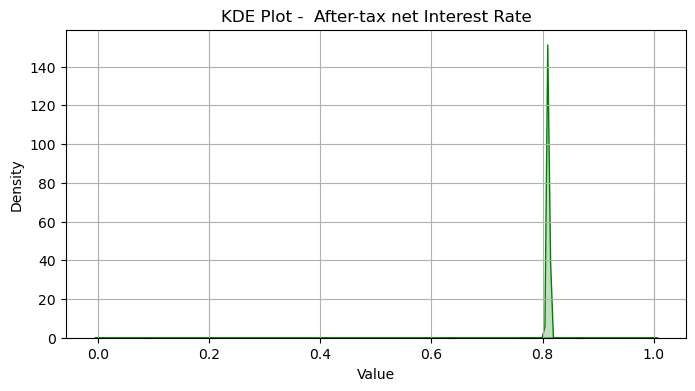

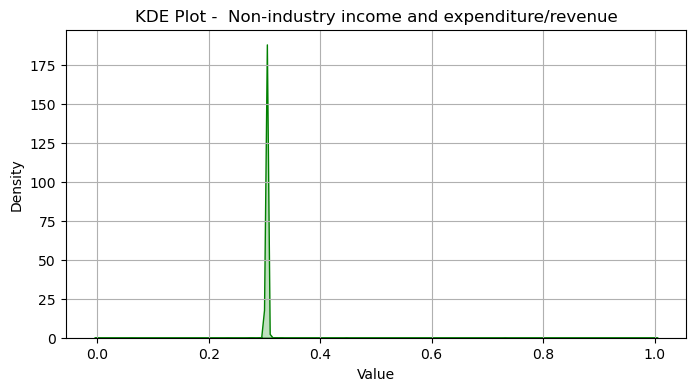

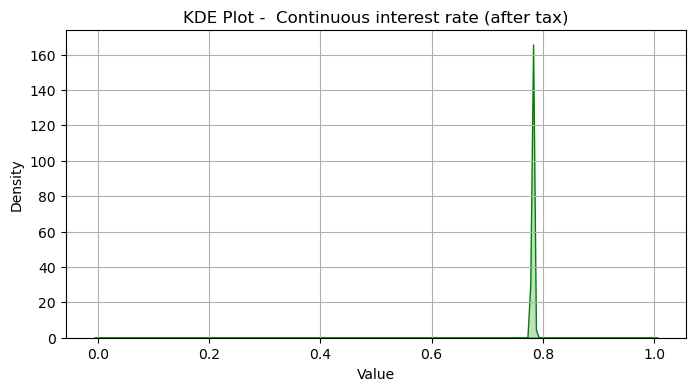

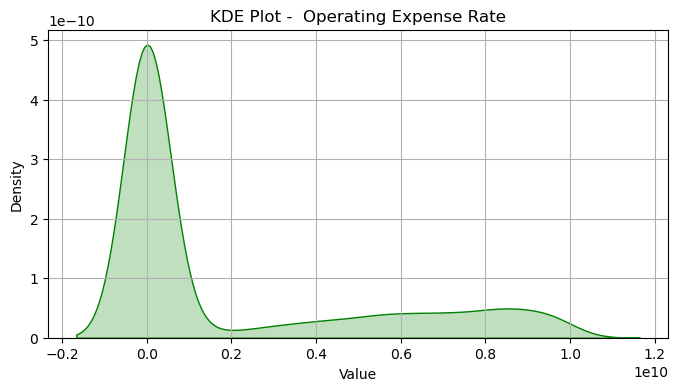

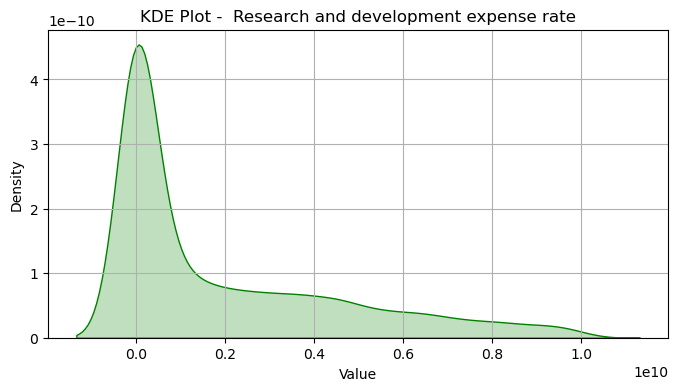

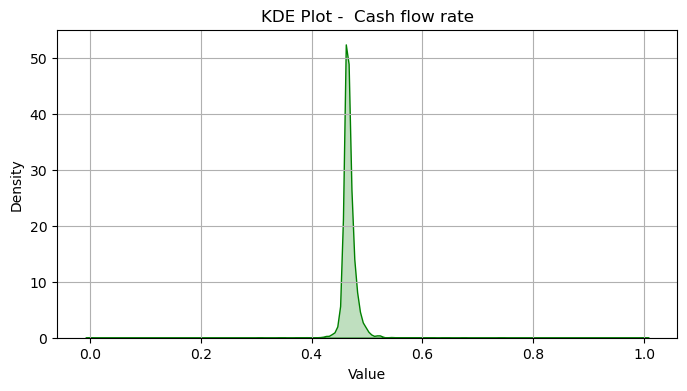

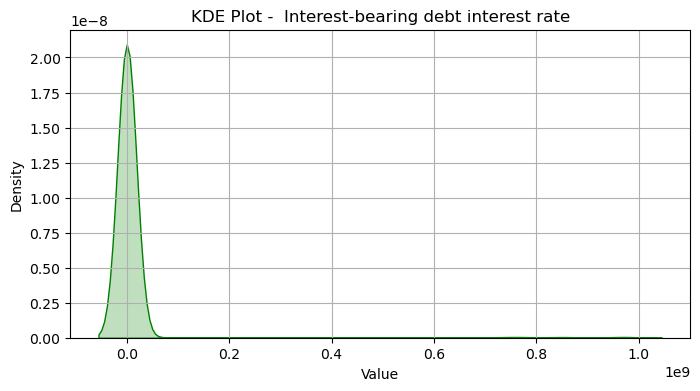

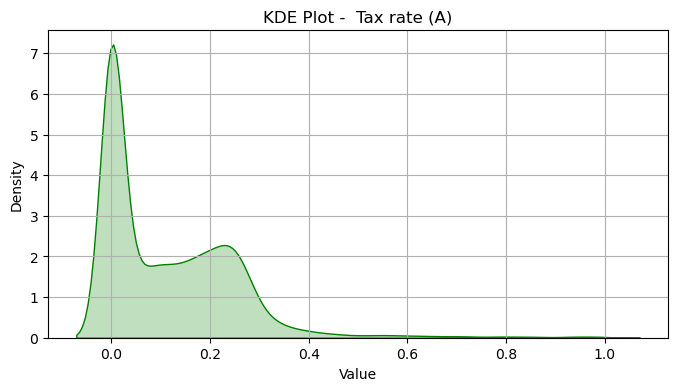

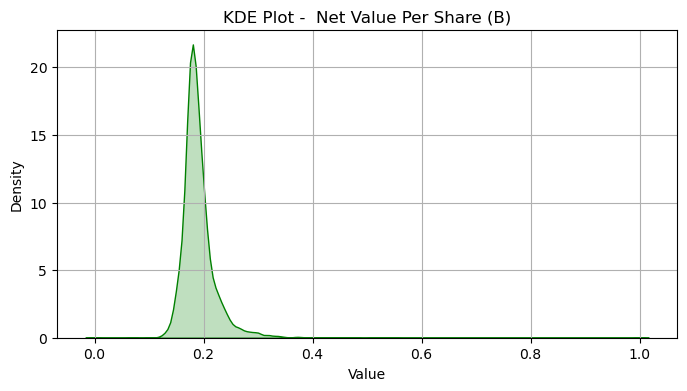

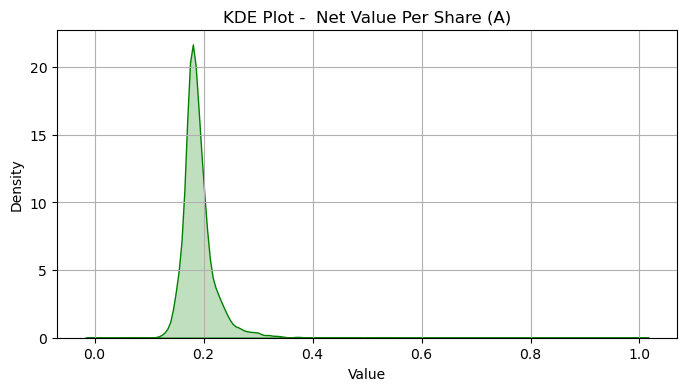

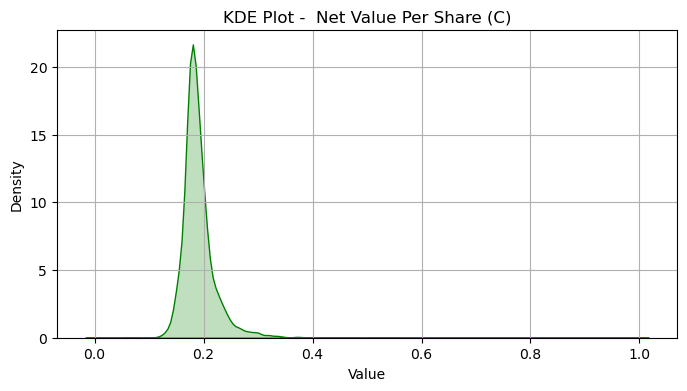

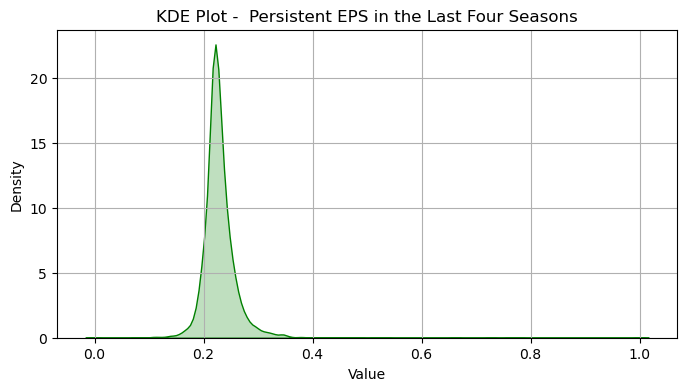

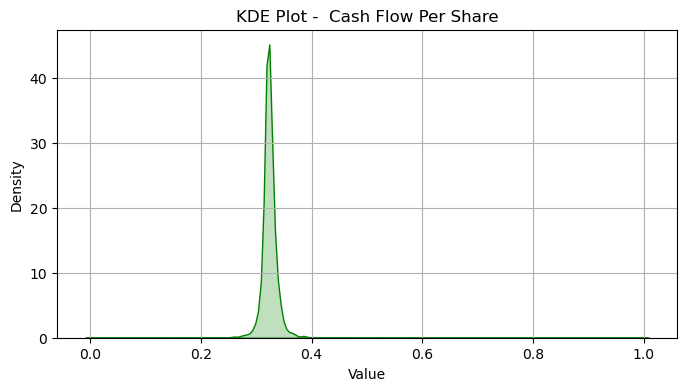

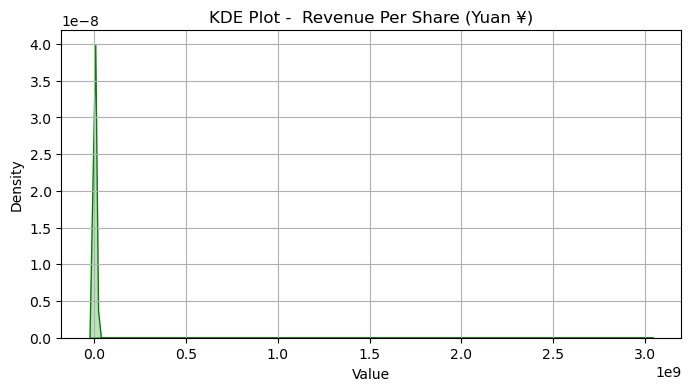

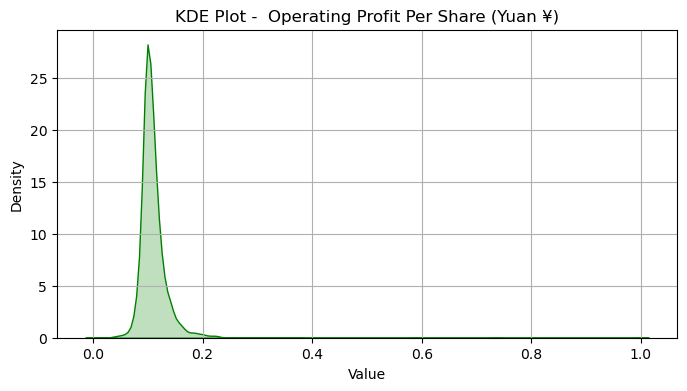

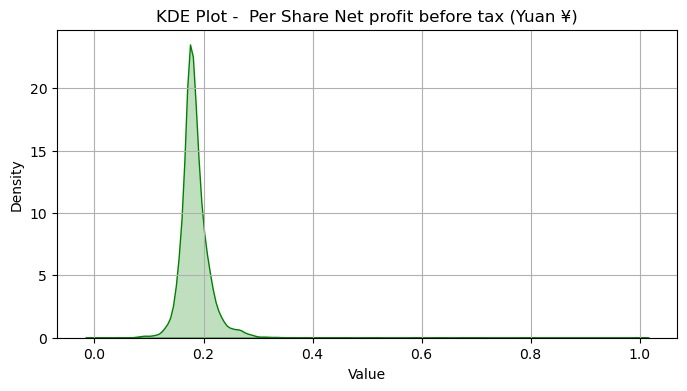

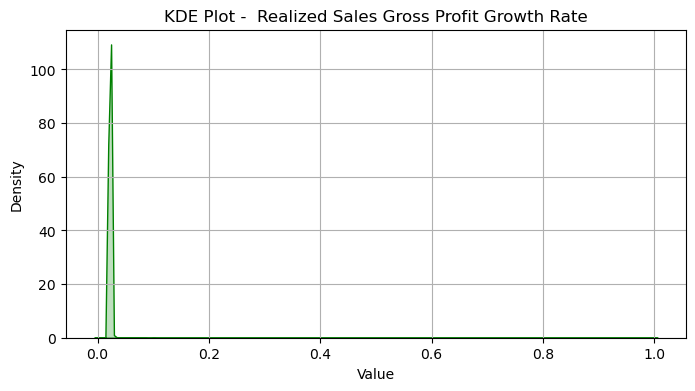

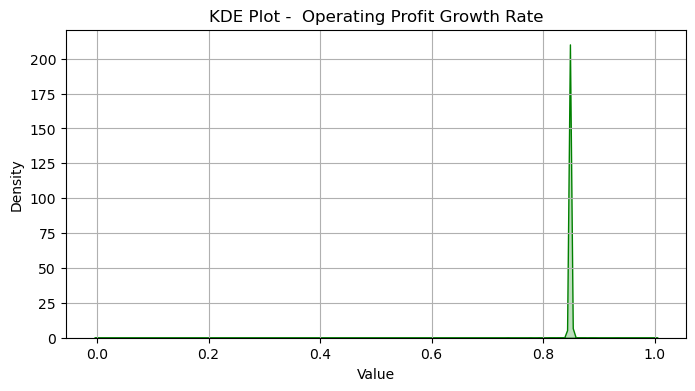

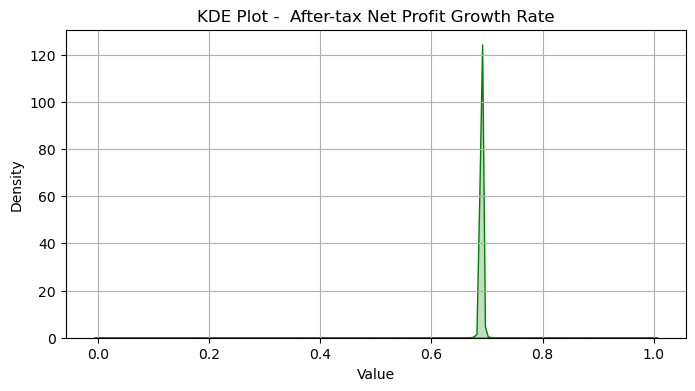

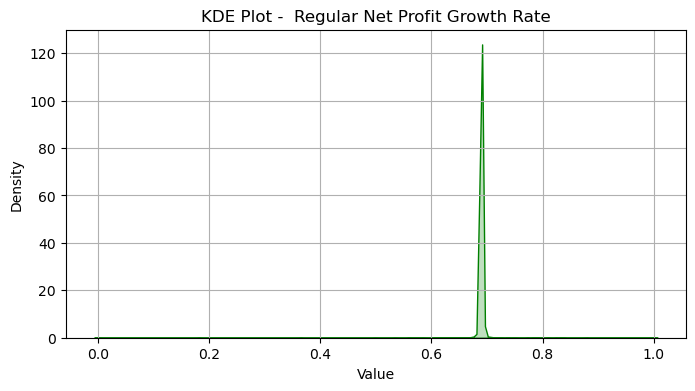

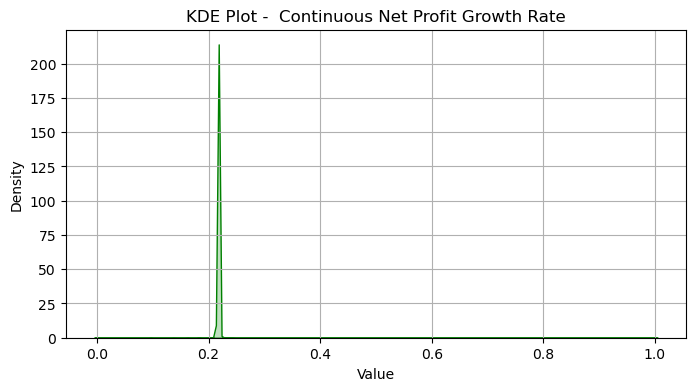

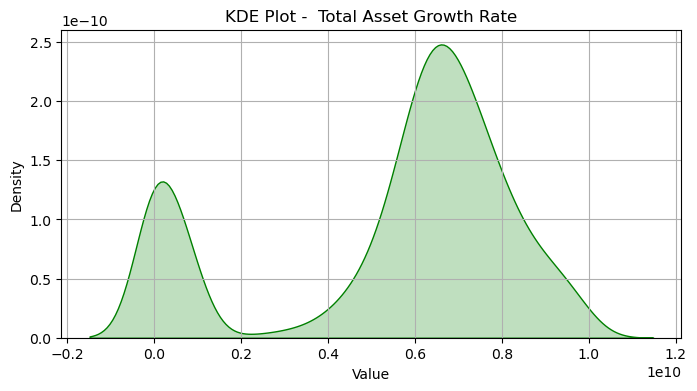

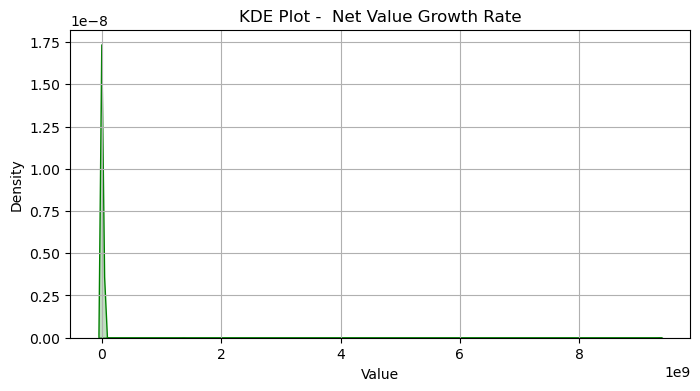

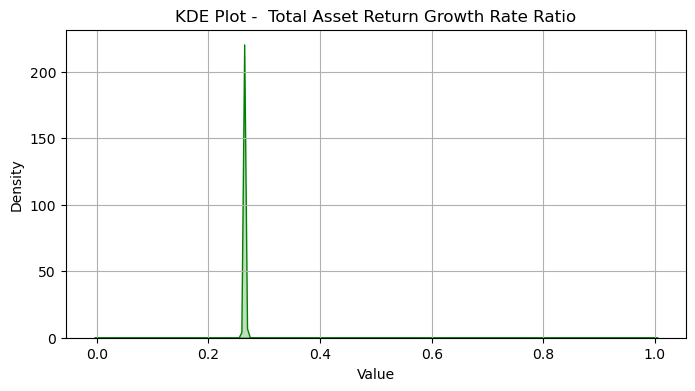

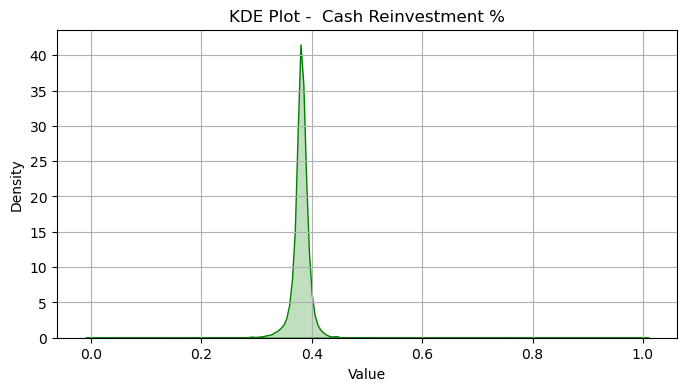

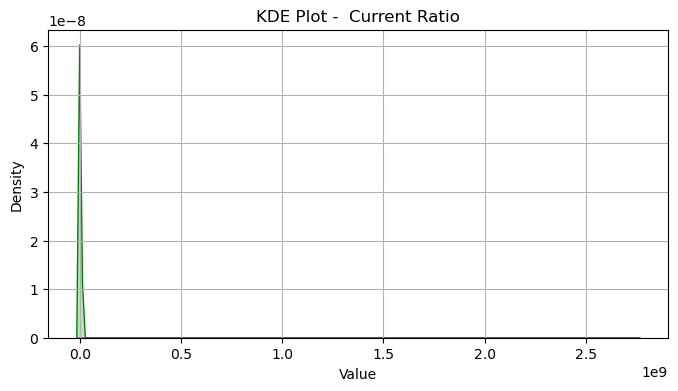

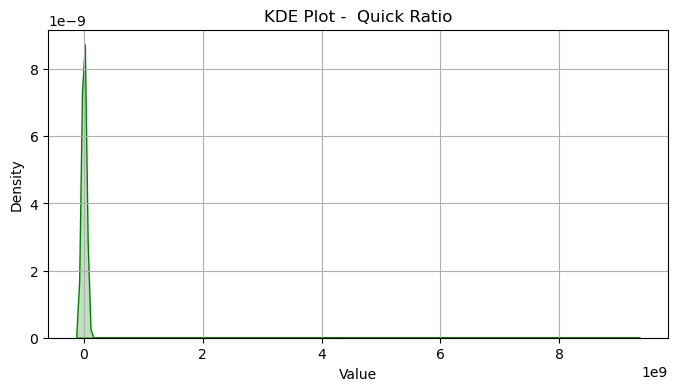

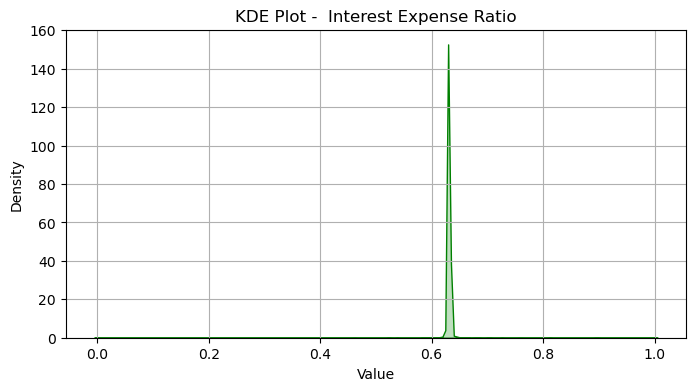

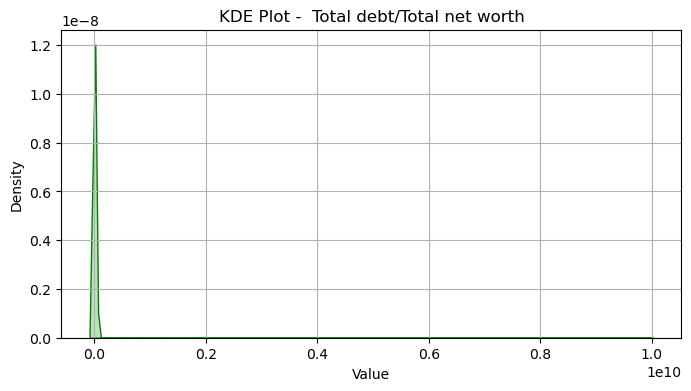

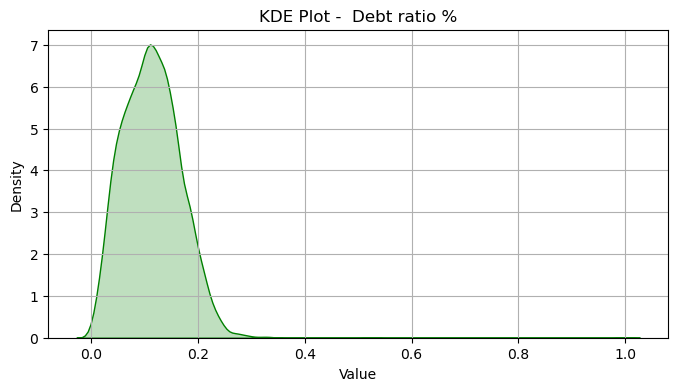

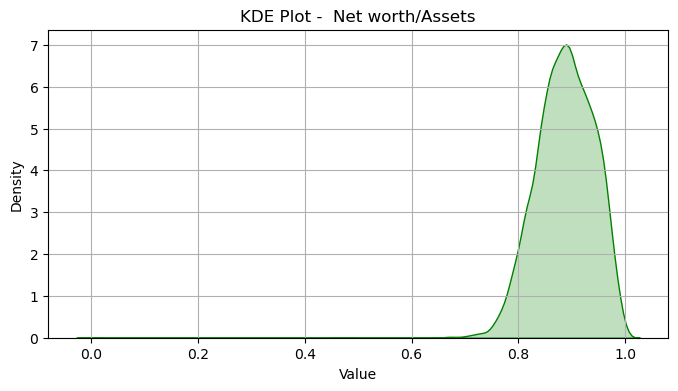

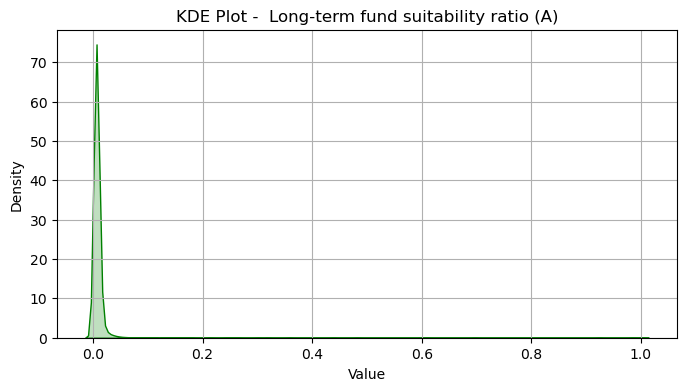

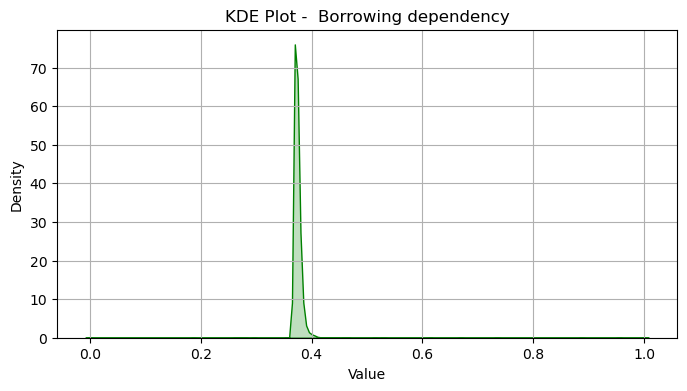

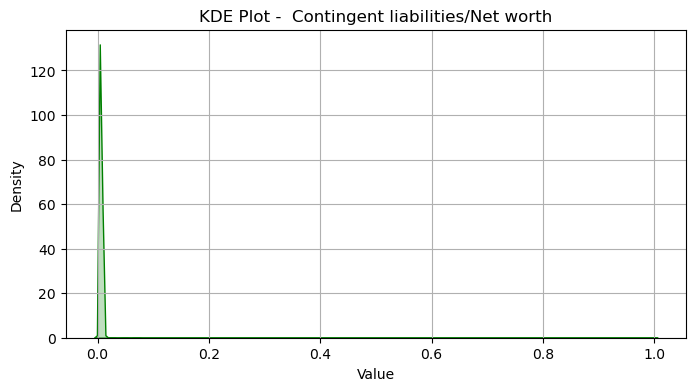

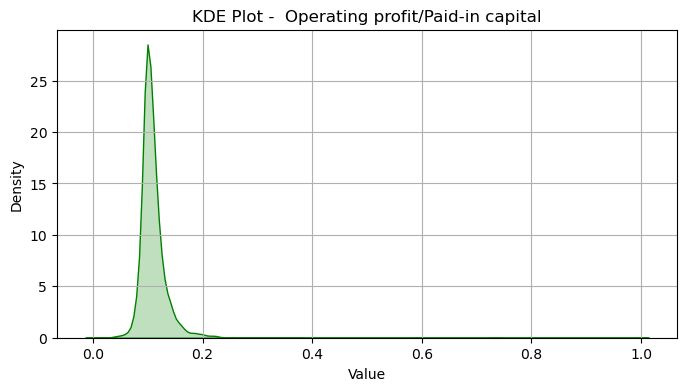

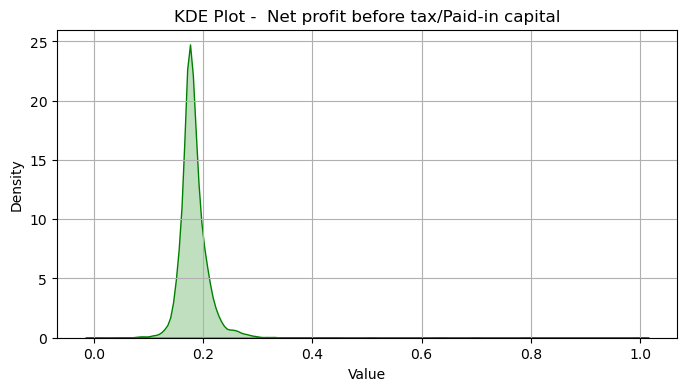

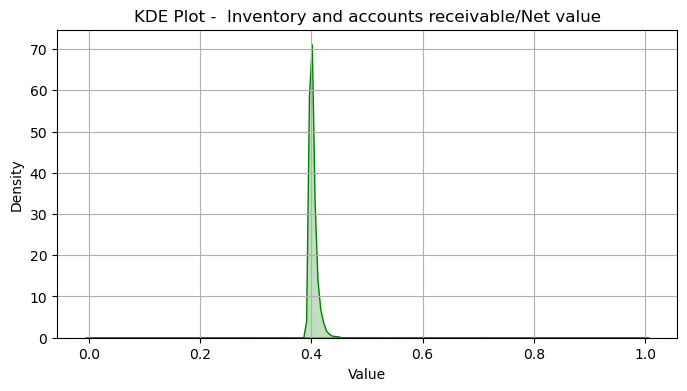

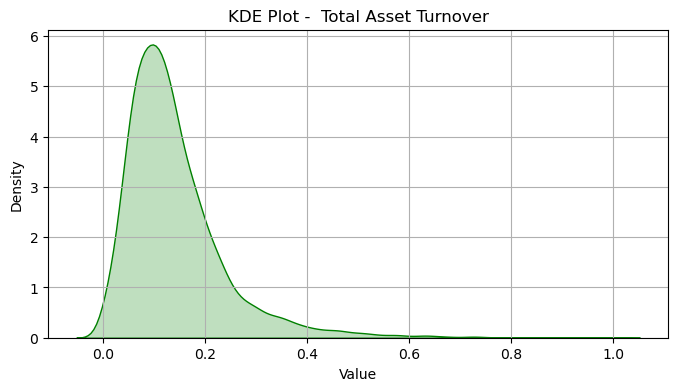

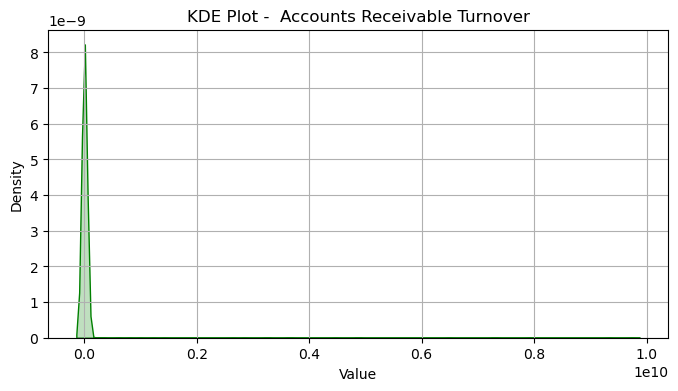

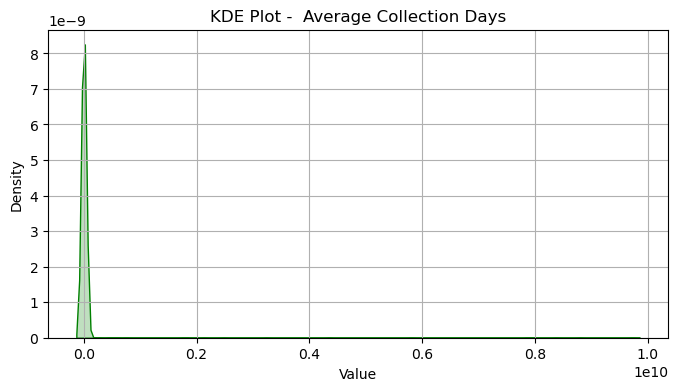

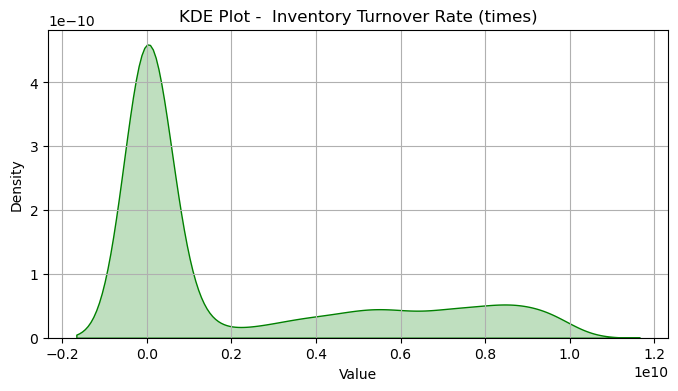

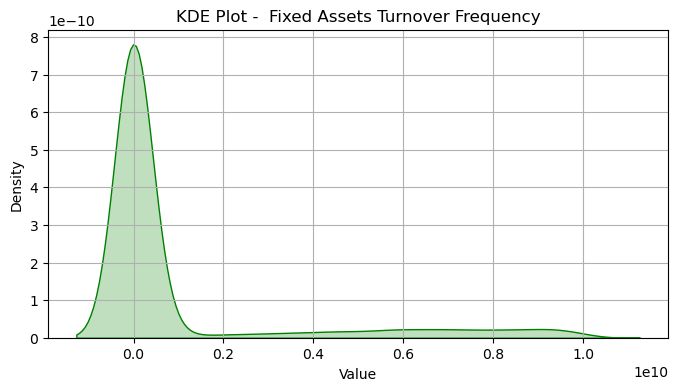

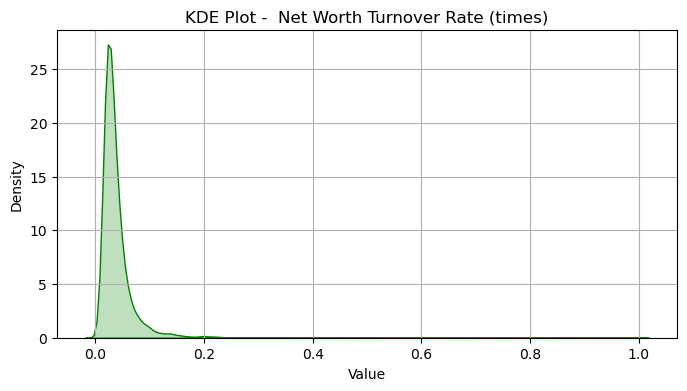

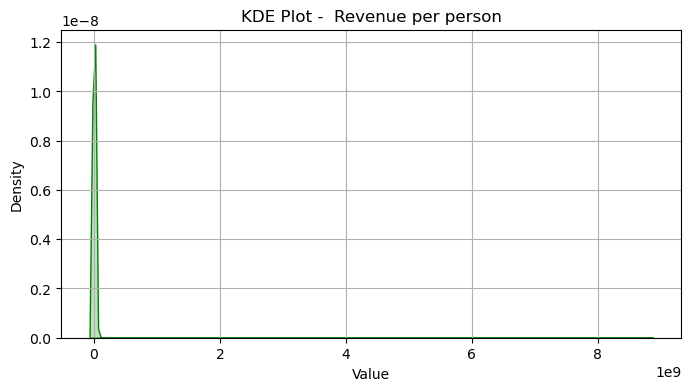

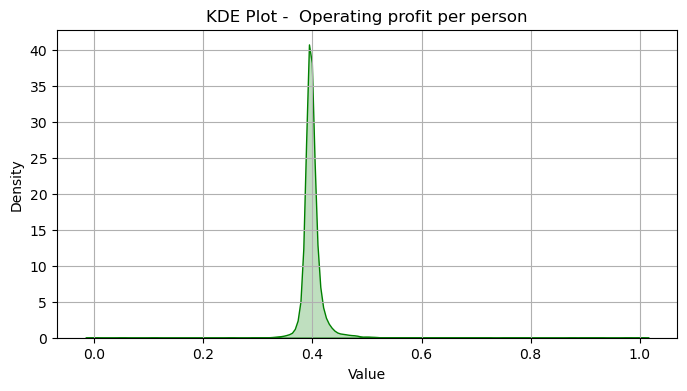

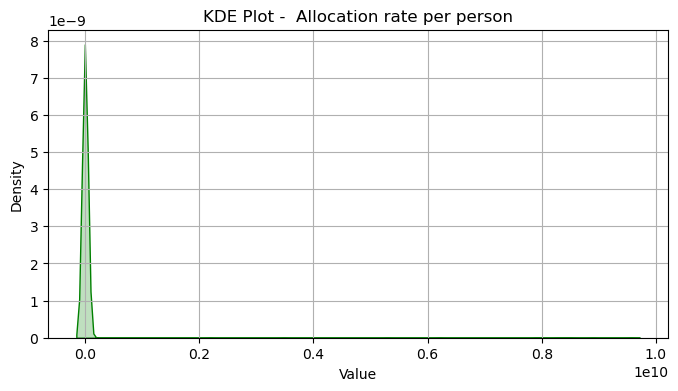

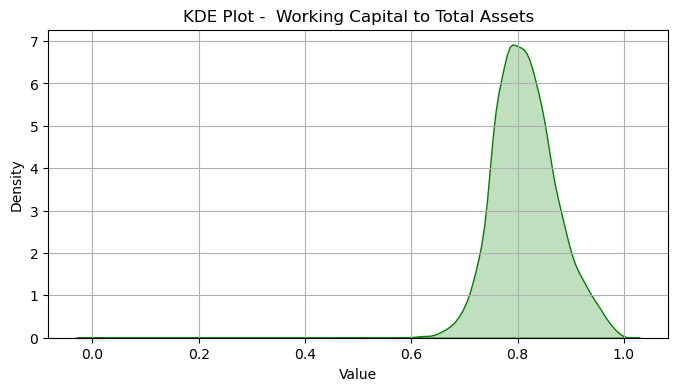

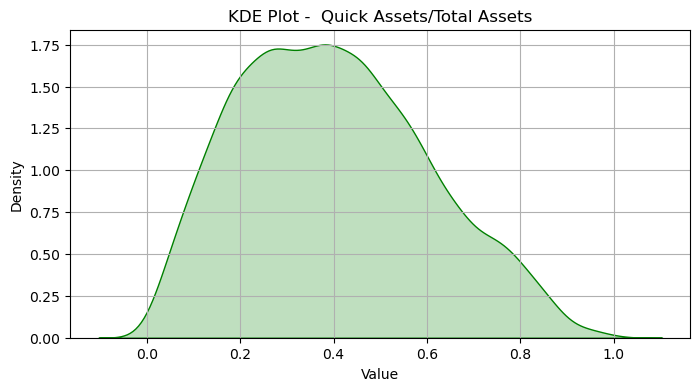

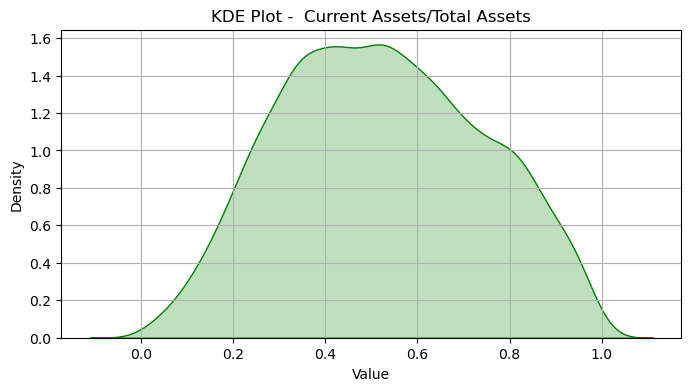

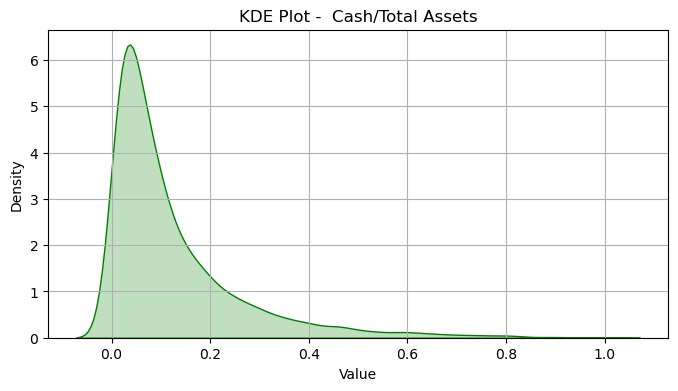

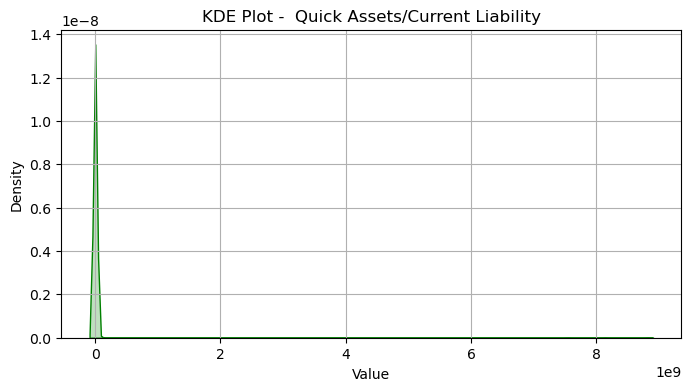

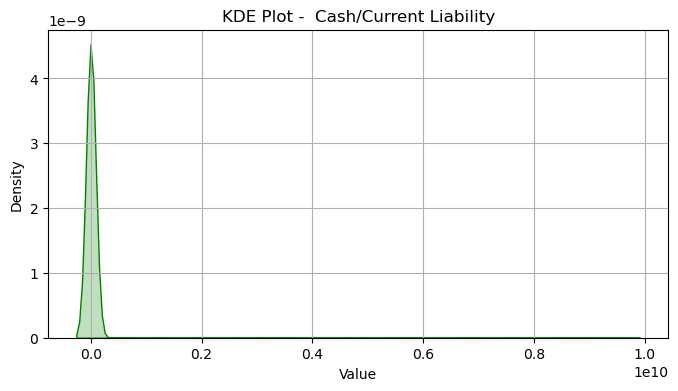

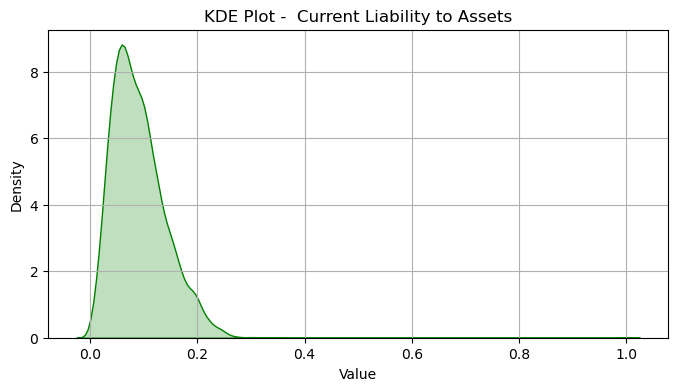

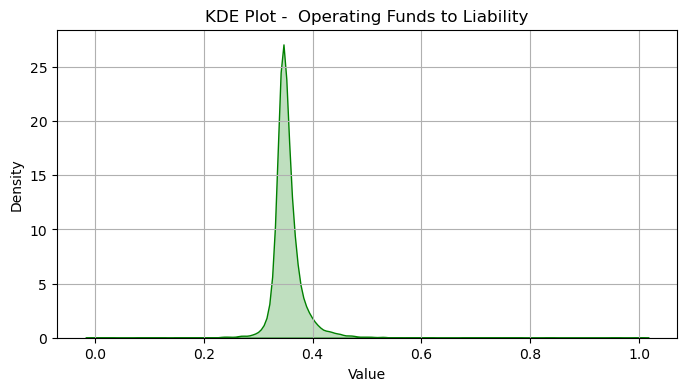

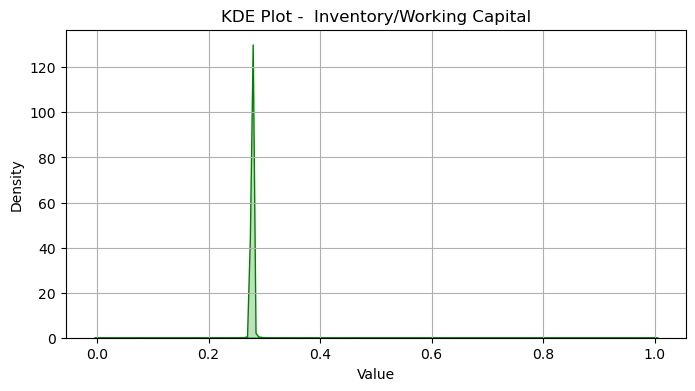

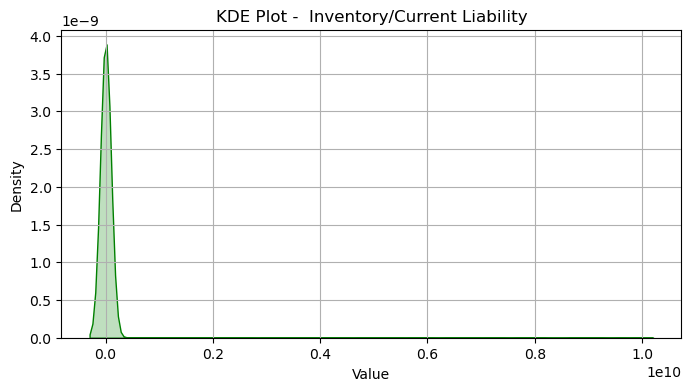

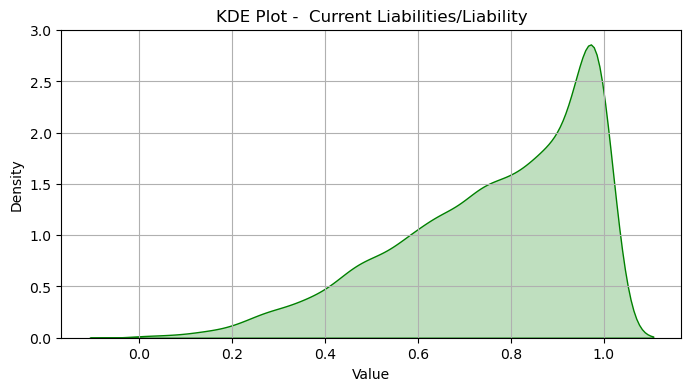

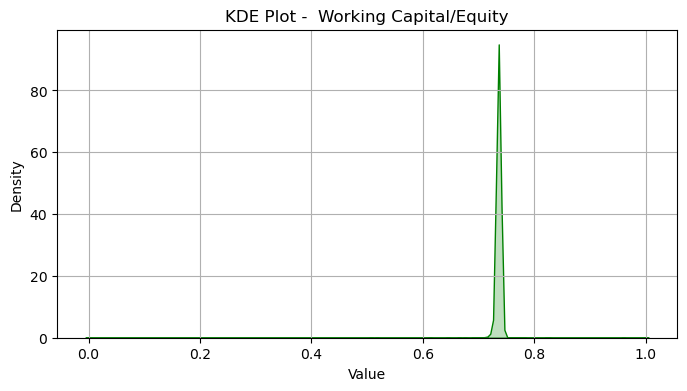

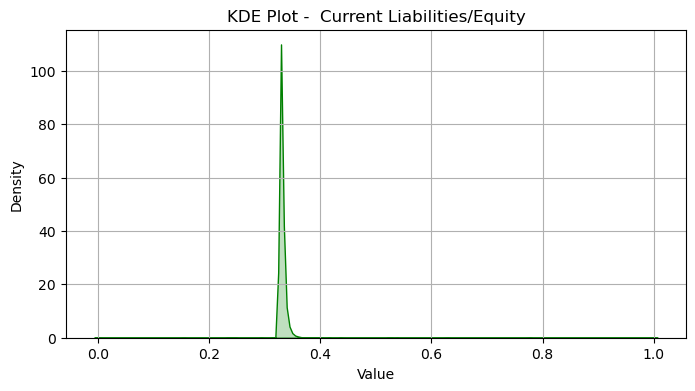

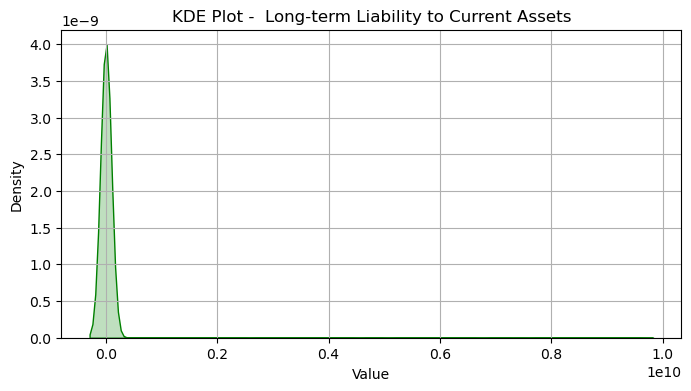

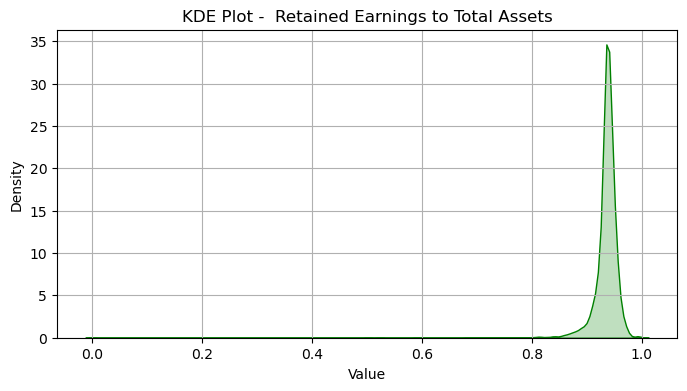

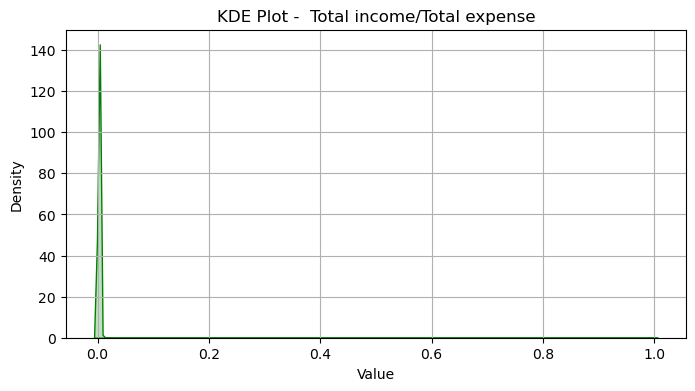

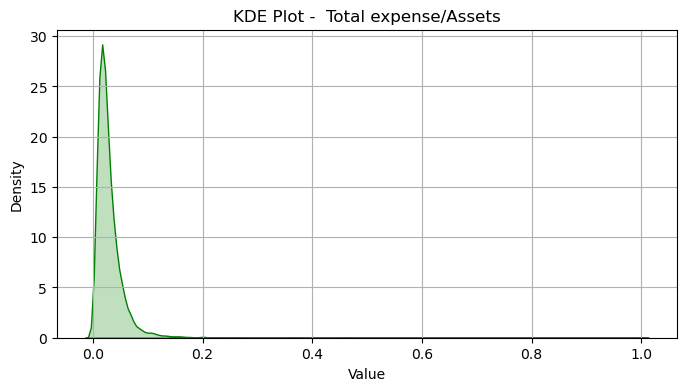

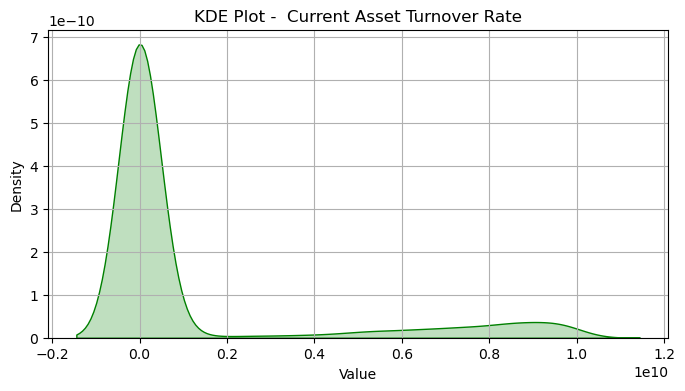

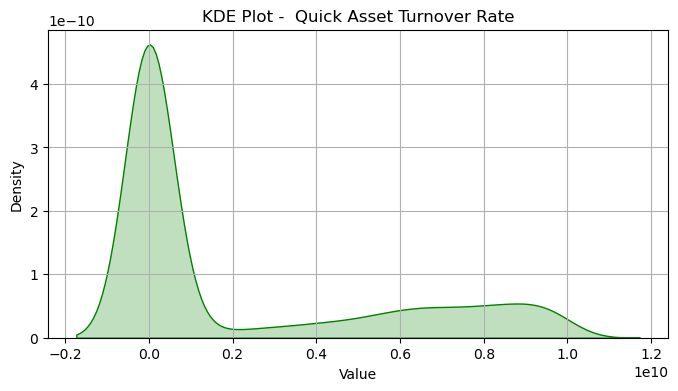

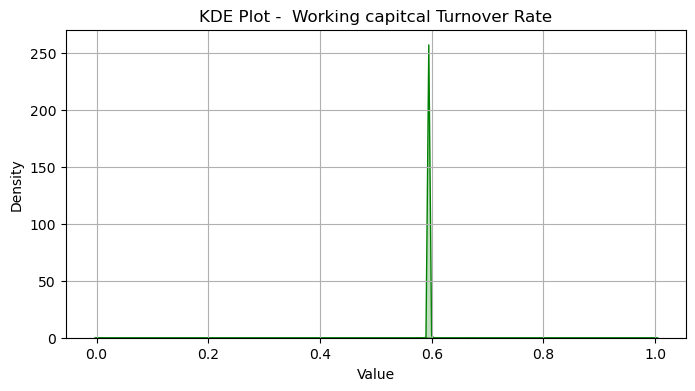

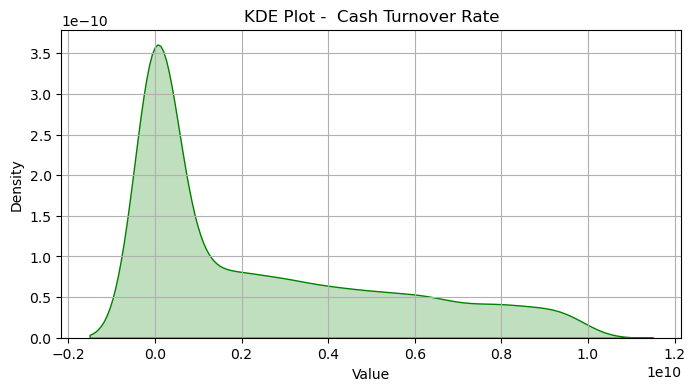

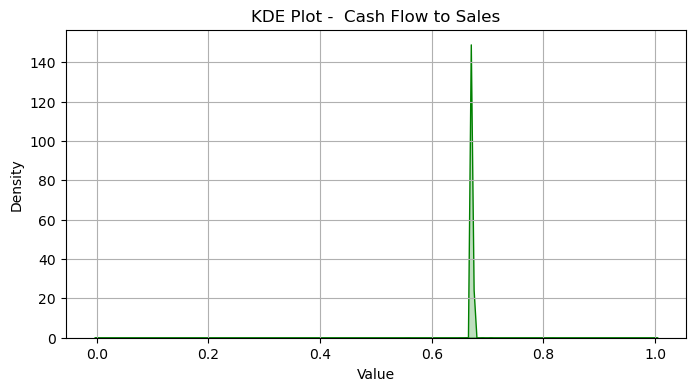

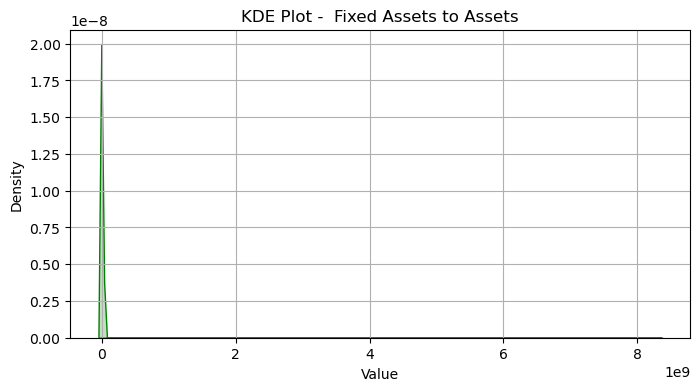

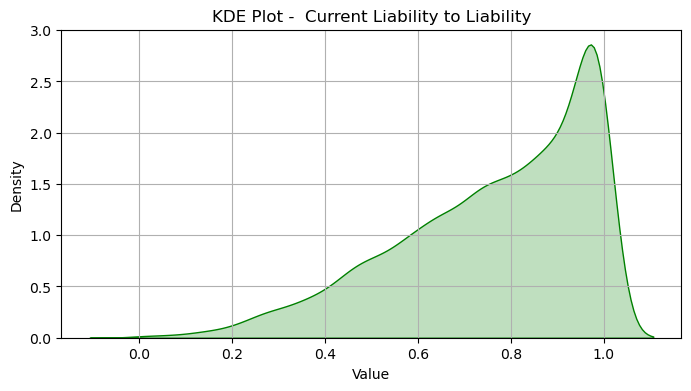

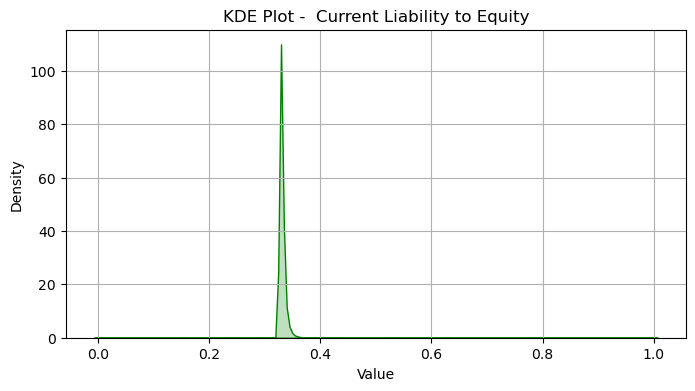

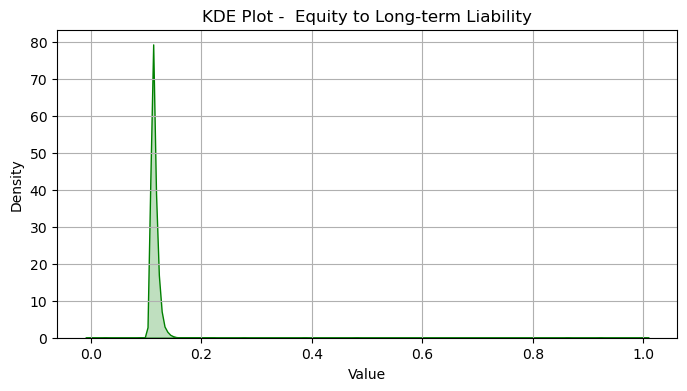

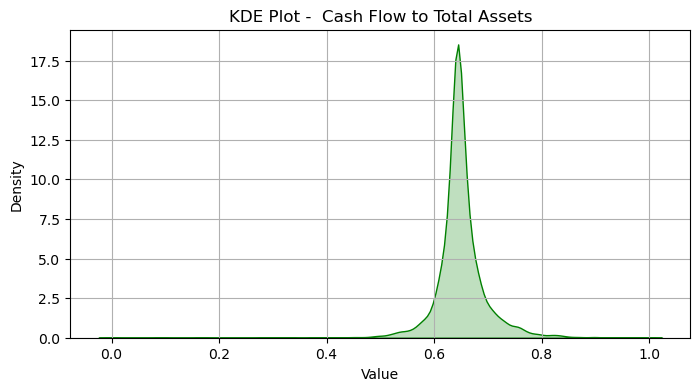

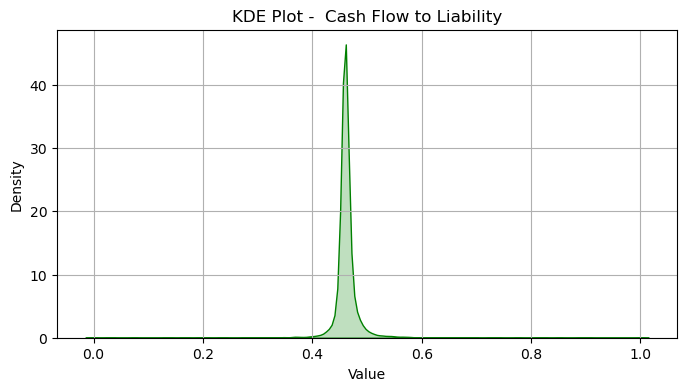

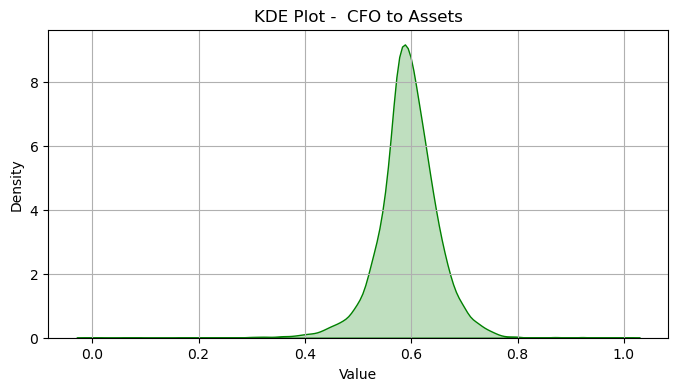

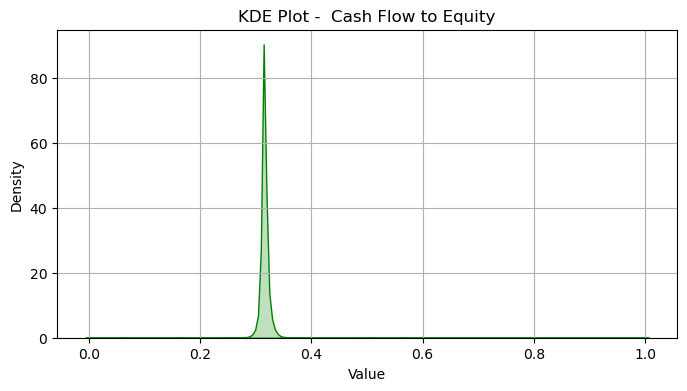

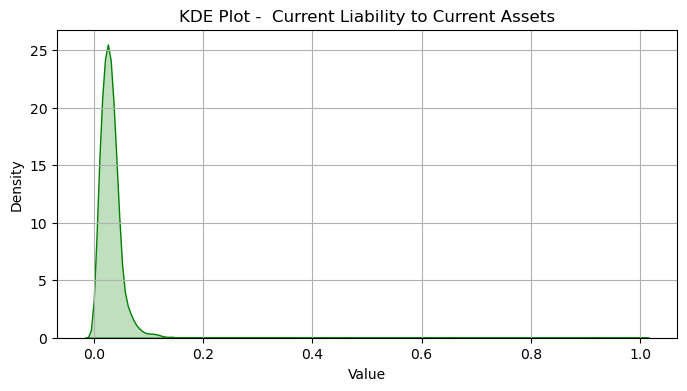

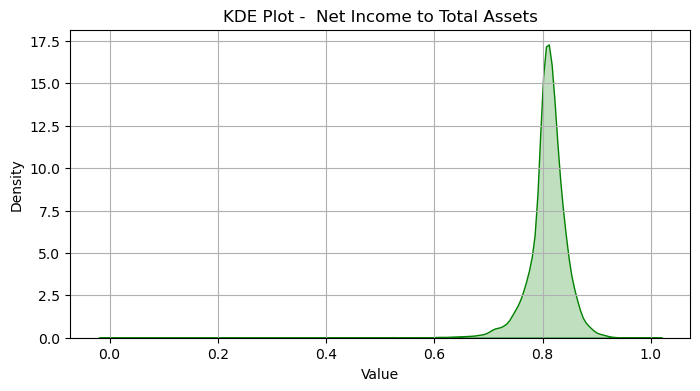

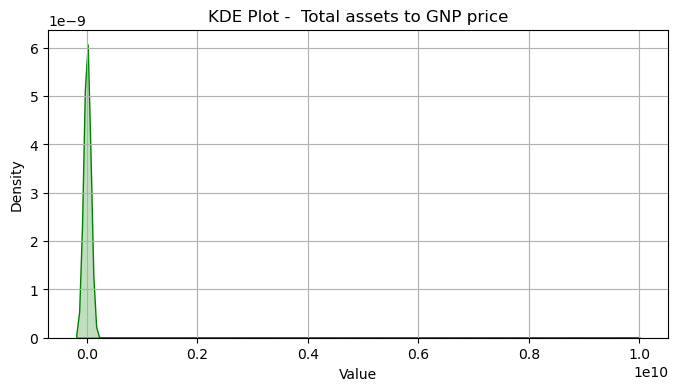

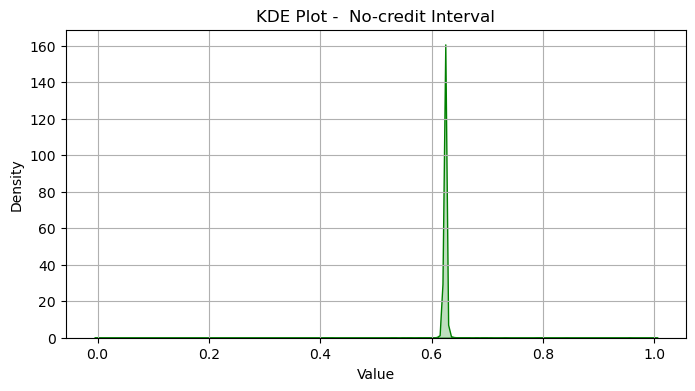

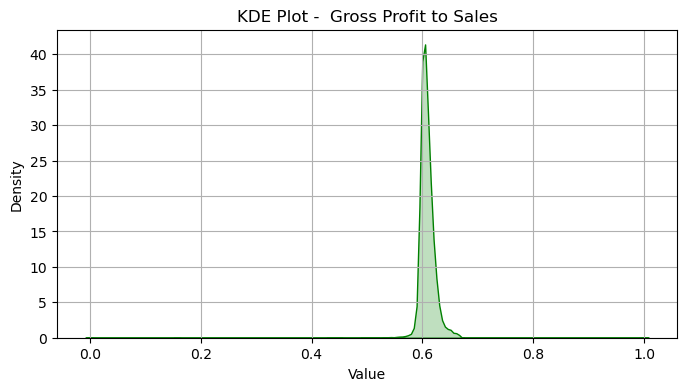

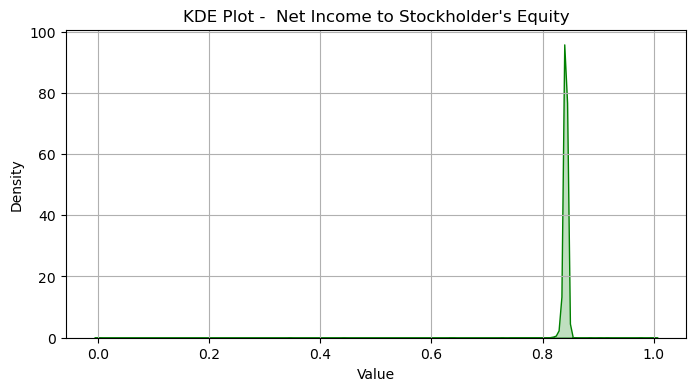

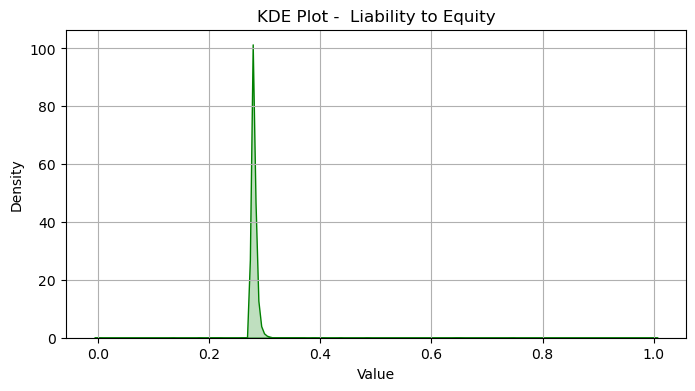

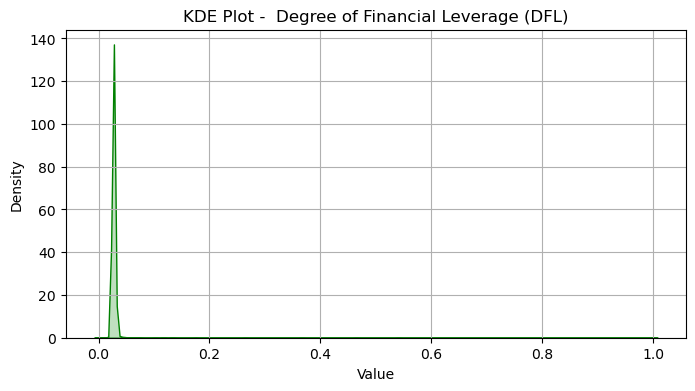

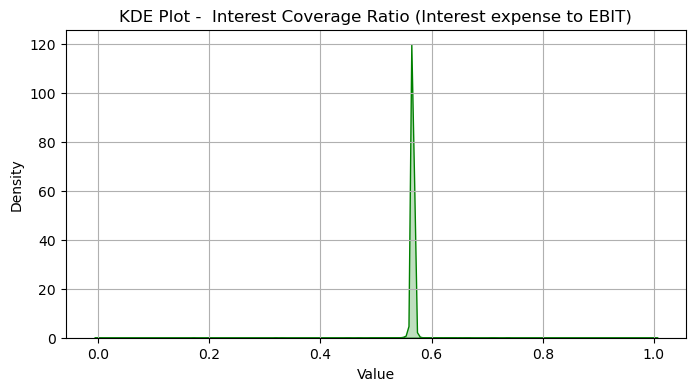

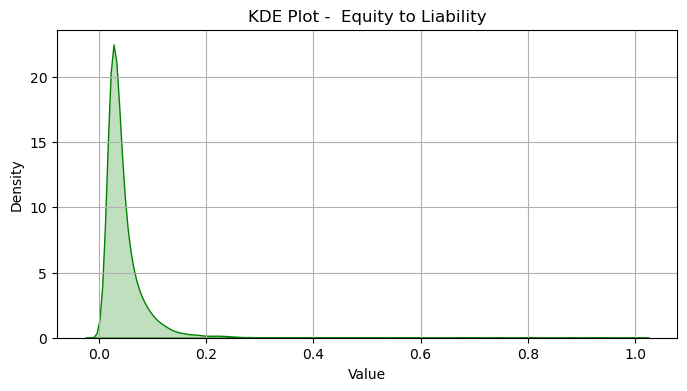

In [18]:
for column in numerical_features.columns:

    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[column], shade=True, color='green')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'KDE Plot - {column}')
    plt.grid(True)
    
    plt.show()


I can see that there a few columns which are normally distributed and a lot columns that are skewed, so there is high presence of
Outliers and Inliers.

SKEWNESS

In [19]:
for column in numerical_features.columns:
    column_skewness = df[column].skew()
    print("Skewness of '{}' column: {}".format(column, column_skewness))

Skewness of ' ROA(C) before interest and depreciation before interest' column: -0.3239410032376897
Skewness of ' ROA(A) before interest and % after tax' column: -1.0337268374435982
Skewness of ' ROA(B) before interest and depreciation after tax' column: -0.7635637191791648
Skewness of ' Operating Gross Margin' column: -8.043367962976834
Skewness of ' Realized Sales Gross Margin' column: -8.066572143637043
Skewness of ' Operating Profit Rate' column: -70.23716436128285
Skewness of ' Pre-tax net Interest Rate' column: -52.48286652280293
Skewness of ' After-tax net Interest Rate' column: -52.99574381463863
Skewness of ' Non-industry income and expenditure/revenue' column: 39.64168918755239
Skewness of ' Continuous interest rate (after tax)' column: -53.200120791151186
Skewness of ' Operating Expense Rate' column: 1.2486733165601693
Skewness of ' Research and development expense rate' column: 1.2820432317125836
Skewness of ' Cash flow rate' column: 3.990585538817217
Skewness of ' Interest-

#### Correlation Matrix:

In [20]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
trace = go.Heatmap(z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns)

# Set the layout for the heatmap
layout = go.Layout(title="Correlation Matrix",
                   xaxis=dict(title="Features"),
                   yaxis=dict(title="Features"))

# Create the figure and plot the heatmap
fig = go.Figure(data=[trace], layout=layout)

# Save the plot as an interactive HTML file
pyo.plot(fig, filename='correlation_matrix.html')

'correlation_matrix.html'

In [22]:
# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Check for high correlations (e.g., greater than 0.8 or -0.8)
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add((feature_i, feature_j))

# Print highly correlated features
print("Highly Correlated Feature Pairs:")
for feature_i, feature_j in highly_correlated_features:
    print(f"{feature_i} and {feature_j}: {correlation_matrix.loc[feature_i, feature_j]}")


Highly Correlated Feature Pairs:
 Operating Profit Per Share (Yuan ¥) and  Net profit before tax/Paid-in capital: 0.8861573968367282
 Current Liabilities/Liability and  Current Liability to Liability: 1.0
 Debt ratio % and  Net worth/Assets: -0.9999999999999993
 Operating Gross Margin and  Gross Profit to Sales: 0.9999999924887606
 Operating Profit Rate and  Continuous interest rate (after tax): 0.9155437834862158
 Per Share Net profit before tax (Yuan ¥) and  Operating profit/Paid-in capital: 0.8583102552070088
 Operating Gross Margin and  Realized Sales Gross Margin: 0.9995182781255221
 Per Share Net profit before tax (Yuan ¥) and  Net profit before tax/Paid-in capital: 0.9627228889556713
 ROA(C) before interest and depreciation before interest and  Net Income to Total Assets: 0.8876695382909829
 Net Value Per Share (B) and  Net Value Per Share (A): 0.9993420298970497
 Operating profit/Paid-in capital and  Net profit before tax/Paid-in capital: 0.8873704466151631
 ROA(C) before inter

In [23]:
len(highly_correlated_features)

43

The data have 43 highly correlated numerical_features

#### Based on my understanding lets check with few columns and remove those.

In [24]:
df_copy = df.copy()

In [25]:
df = df.loc[:, ~df.columns.duplicated()]

removed_duplicate_columns = [col for col in df_copy.columns if col not in df.columns]

print("Duplicate Columns Removed:")
print(removed_duplicate_columns)

Duplicate Columns Removed:
[]


In [26]:
new_df = df.copy()

columns_to_remove = [' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',' Realized Sales Gross Margin',
       ' Pre-tax net Interest Rate',
       ' Research and development expense rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate']


new_df.drop(columns=columns_to_remove, inplace=True)
print(new_df.head(10))

   Bankrupt?   ROA(B) before interest and depreciation after tax  \
0          1                                           0.405750    
1          1                                           0.516730    
2          1                                           0.472295    
3          1                                           0.457733    
4          1                                           0.522298    
5          1                                           0.419134    
6          0                                           0.436158    
7          0                                           0.559077    
8          0                                           0.543284    
9          0                                           0.542963    

    Operating Gross Margin   Operating Profit Rate  \
0                 0.601457                0.998969   
1                 0.610235                0.998946   
2                 0.601450                0.998857   
3                 0.583541         

In [27]:
new_df.shape

(6819, 83)

In [28]:
new_df.head(5)

Bankrupt?   ROA(B) before interest and depreciation after tax  \
0          1                                           0.405750    
1          1                                           0.516730    
2          1                                           0.472295    
3          1                                           0.457733    
4          1                                           0.522298    

    Operating Gross Margin   Operating Profit Rate  \
0                 0.601457                0.998969   
1                 0.610235                0.998946   
2                 0.601450                0.998857   
3                 0.583541                0.998700   
4                 0.598783                0.998973   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Cash flow rate   Interest-bearing debt interest rate  \
0         0.458143                              0.000725   
1         0.461867                              0.000647   
2         0.458521                              0.000790   
3         0.465705                              0.000449   
4         0.462746                              0.000686   

    Persistent EPS in the Last Four Seasons   Cash Flow Per Share  \
0                                  0.169141              0.311664   
1                                  0.208944              0.318137   
2                                  0.180581              0.307102   
3                                  0.193722              0.321674   
4                                  0.212537              0.319162   

    Revenue Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)  \
0                     0.017560                                   0.138736   
1                     0.021144                                   0.169918   
2                     0.005944                                   0.142803   
3                     0.014368                                   0.148603   
4                     0.029690                                   0.168412   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.022102                       0.848195   
1                                  0.022080                       0.848088   
2                                  0.022760                       0.848094   
3                                  0.022046                       0.848005   
4                                  0.022096                       0.848258   

    After-tax Net Profit Growth Rate   Total Asset Growth Rate  \
0                           0.688979              4.980000e+09   
1                           0.689693              6.110000e+09   
2                           0.689463              7.280000e+09   
3                           0.689110              4.880000e+09   
4                           0.689697              5.510000e+09   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0                0.000327                               0.263100   
1                0.000443                               0.264516   
2                0.000396                               0.

#### 12 Columns removed as they are giving the same information like literally.

In [29]:
categorical_columns = []
numerical_columns = []


for col in new_df.columns:
    if new_df[col].dtype == 'object' or len(new_df[col].unique()) <= 2:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['Bankrupt?', ' Liability-Assets Flag']

Numerical Columns:
[' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Operating Profit Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net wo

In [30]:
# for column in numerical_columns:

#     plt.figure(figsize=(8, 4))
#     sns.kdeplot(df[column], shade=True, color='green')
#     plt.xlabel('Value')
#     plt.ylabel('Density')
#     plt.title(f'KDE Plot - {column}')
#     plt.grid(True)
    
#     plt.show()

In [31]:
pd.options.display.float_format = '{:.10f}'.format

print("\nDataFrame with Float Format:")
new_df.head(10)


DataFrame with Float Format:


Bankrupt?   ROA(B) before interest and depreciation after tax  \
0          1                                       0.4057497725    
1          1                                       0.5167300177    
2          1                                       0.4722950907    
3          1                                       0.4577332834    
4          1                                       0.5222977675    
5          1                                       0.4191337866    
6          0                                       0.4361582526    
7          0                                       0.5590770384    
8          0                                       0.5432839017    
9          0                                       0.5429626854    

    Operating Gross Margin   Operating Profit Rate  \
0             0.6014572133            0.9989692032   
1             0.6102350855            0.9989459782   
2             0.6014500065            0.9988573535   
3             0.5835411292            0.9986997471   
4             0.5987834936            0.9989731318   
5             0.5901713775            0.9987580984   
6             0.6199498407            0.9989931215   
7             0.6017382782            0.9990089514   
8             0.6036120440            0.9989607683   
9             0.5992086943            0.9990006320   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                  0.8088093609                                  0.3026464339   
1                  0.8093007257                                  0.3035564303   
2                  0.8083875215                                  0.3020351773   
3                  0.8089655977                                  0.3033495360   
4                  0.8093037202                                  0.3034749778   
5                  0.8087705621                                  0.3031158132   
6                  0.8089603898                                  0.3028144146   
7                  0.8093615278                                  0.3035445870   
8                  0.8093380923                                  0.3035835006   
9                  0.8093203855                                  0.3034829538   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                           0.7809848502             0.0001256969   
1                           0.7815059743             0.0002897851   
2                           0.7802839362             0.0002361297   
3                           0.7812409912             0.0001078888   
4                           0.7815500446    7890000000.0000000000   
5                           0.7810690609             0.0001571500   
6                           0.7811800788             0.0003984834   
7                           0.7816214834    9000000000.0000000000   
8                           0.7815981851             0.0001687136   
9                           0.7815741850    5820000000.0000000000   

    Cash flow rate   Interest-bearing debt interest rate  \
0     0.4581431435                          0.0007250725   
1     0.4618672572                          0.0006470647   
2     0.4585205875                          0.0007900790   
3     0.4657054427                          0.0004490449   
4     0.4627462822                          0.0006860686   
5     0.4658614529                          0.0007160716   
6     0.4610201052                          0.0008050805   
7     0.4670239803                          0.0006300630   
8     0.4631421789                          0.0007370737   
9     0.4705753085                          0.0006720672   

    Persistent EPS in the Last Four Seasons   Cash Flow Per Share  \
0                              0.1691405881          0.3116644267   
1                              0.2089439350          0.3181368041   
2                              0.1805805049          0.3071019311   
3                              0.1937222275          0.3216736224   
4

In [32]:
correlation_matrix = new_df.corr()

# Create a heatmap of the correlation matrix
trace = go.Heatmap(z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns)

# Set the layout for the heatmap
layout = go.Layout(title="Correlation Matrix",
                   xaxis=dict(title="Features"),
                   yaxis=dict(title="Features"))

# Create the figure and plot the heatmap
fig = go.Figure(data=[trace], layout=layout)

# Save the plot as an interactive HTML file
pyo.plot(fig, filename='new_df_correlation_matrix.html')

'new_df_correlation_matrix.html'

In [33]:
correlation_matrix

Bankrupt?  \
Bankrupt?                                           1.0000000000   
 ROA(B) before interest and depreciation after tax -0.2730513179   
 Operating Gross Margin                            -0.1000432441   
 Operating Profit Rate                             -0.0002298174   
 After-tax net Interest Rate                       -0.0088572233   
 Non-industry income and expenditure/revenue       -0.0165926376   
 Continuous interest rate (after tax)              -0.0083948590   
 Operating Expense Rate                            -0.0060832255   
 Cash flow rate                                    -0.0723555512   
 Interest-bearing debt interest rate               -0.0230628090   
 Persistent EPS in the Last Four Seasons           -0.2195596812   
 Cash Flow Per Share                               -0.0775164598   
 Revenue Per Share (Yuan ¥)                        -0.0046920382   
 Per Share Net profit before tax (Yuan ¥)          -0.2013948345   
 Realized Sales Gross Profit Growth Rate           -0.0004583838   
 Operating Profit Growth Rate                      -0.0151679461   
 After-tax Net Profit Growth Rate                  -0.0377829729   
 Total Asset Growth Rate                           -0.0444310214   
 Net Value Growth Rate                              0.0653294244   
 Total Asset Return Growth Rate Ratio              -0.0168576794   
 Cash Reinvestment %                               -0.0513452043   
 Current Ratio                                     -0.0022112802   
 Quick Ratio                                        0.0250582887   
 Interest Expense Ratio                            -0.0026809338   
 Total debt/Total net worth                         0.0123135860   
 Debt ratio %                                       0.2501609621   
 Net worth/Assets                                  -0.2501609621   
 Long-term fund suitability ratio (A)               0.0169199048   
 Borrowing dependency                               0.1765429362   
 Contingent liabilities/Net worth                   0.0704545248   
 Operating profit/Paid-in capital                  -0.1411113238   
 Net profit before tax/Paid-in capital             -0.2078565200   
 Inventory and accounts receivable/Net value        0.0752780821   
 Total Asset Turnover                              -0.0679151672   
 Accounts Receivable Turnover                      -0.0047538674   
 Average Collection Days                           -0.0065555396   
 Inventory Turnover Rate (times)                   -0.0013758448   
 Fixed Assets Turnover Frequency                    0.0728182642   
 Net Worth Turnover Rate (times)                    0.0210891883   
 Revenue per person                                 0.0397184765   
 Operating profit per person                       -0.0928421410   
 Allocation rate per person                         0.0028288021   
 Working Capital to Total Assets                   -0.1930833758   
 Quick Assets/Total Assets                         -0.0863821115   
 Current Assets/Total Assets                       -0.0448233389   
 Cash/Total Assets                                 -0.1001301899   
 Quick Assets/Current Liability                    -0.0038227801   
 Cash/Current Liability                             0.0779210962   
 Current Liability to Assets                        0.1944944359   
 Operating Funds to Liability                      -0.0770819609   
 Inventory/Working Capital                         -0.0019063429   
 Inventory/Current Liability                        0.0008220942   
 Current Liabilities/Liability                     -0.0208093268   
 Working Capital/Equity                            -0.1472208765   
 Current Liabilities/Equity                         0.1538283619   
 Long-term Liability to Current Assets              0.0007783681   
 Retained Earnings to Total Assets                 -0.2177787800   
 Total income/Total expense                        -0.0071369239   
 Total expense/Assets                      

In [34]:
# Set the correlation threshold for "high correlation"
correlation_threshold = 0.9

# Get the pairs of columns that are highly correlated
highly_correlated_pairs = []
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.index:
        if column1 != column2 and abs(correlation_matrix.loc[column1, column2]) >= correlation_threshold:
            highly_correlated_pairs.append((column1, column2))

# Print the highly correlated pairs
print("Pairs of columns with correlation coefficient >= {}: {}".format(correlation_threshold, highly_correlated_pairs))

Pairs of columns with correlation coefficient >= 0.9: [(' ROA(B) before interest and depreciation after tax', ' Net Income to Total Assets'), (' Operating Gross Margin', ' Gross Profit to Sales'), (' Operating Profit Rate', ' Continuous interest rate (after tax)'), (' After-tax net Interest Rate', ' Continuous interest rate (after tax)'), (' Continuous interest rate (after tax)', ' Operating Profit Rate'), (' Continuous interest rate (after tax)', ' After-tax net Interest Rate'), (' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)'), (' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital'), (' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons'), (' Per Share Net profit before tax (Yuan ¥)', ' Net profit before tax/Paid-in capital'), (' Debt ratio %', ' Net worth/Assets'), (' Net worth/Assets', ' Debt ratio %'), (' Borrowing dependency', ' Liability to Equity'), (' Net profit before tax/

In [35]:
print(len(highly_correlated_pairs))
highly_correlated_pairs

28


[(' ROA(B) before interest and depreciation after tax',
  ' Net Income to Total Assets'),
 (' Operating Gross Margin', ' Gross Profit to Sales'),
 (' Operating Profit Rate', ' Continuous interest rate (after tax)'),
 (' After-tax net Interest Rate', ' Continuous interest rate (after tax)'),
 (' Continuous interest rate (after tax)', ' Operating Profit Rate'),
 (' Continuous interest rate (after tax)', ' After-tax net Interest Rate'),
 (' Persistent EPS in the Last Four Seasons',
  ' Per Share Net profit before tax (Yuan ¥)'),
 (' Persistent EPS in the Last Four Seasons',
  ' Net profit before tax/Paid-in capital'),
 (' Per Share Net profit before tax (Yuan ¥)',
  ' Persistent EPS in the Last Four Seasons'),
 (' Per Share Net profit before tax (Yuan ¥)',
  ' Net profit before tax/Paid-in capital'),
 (' Debt ratio %', ' Net worth/Assets'),
 (' Net worth/Assets', ' Debt ratio %'),
 (' Borrowing dependency', ' Liability to Equity'),
 (' Net profit before tax/Paid-in capital',
  ' Persisten

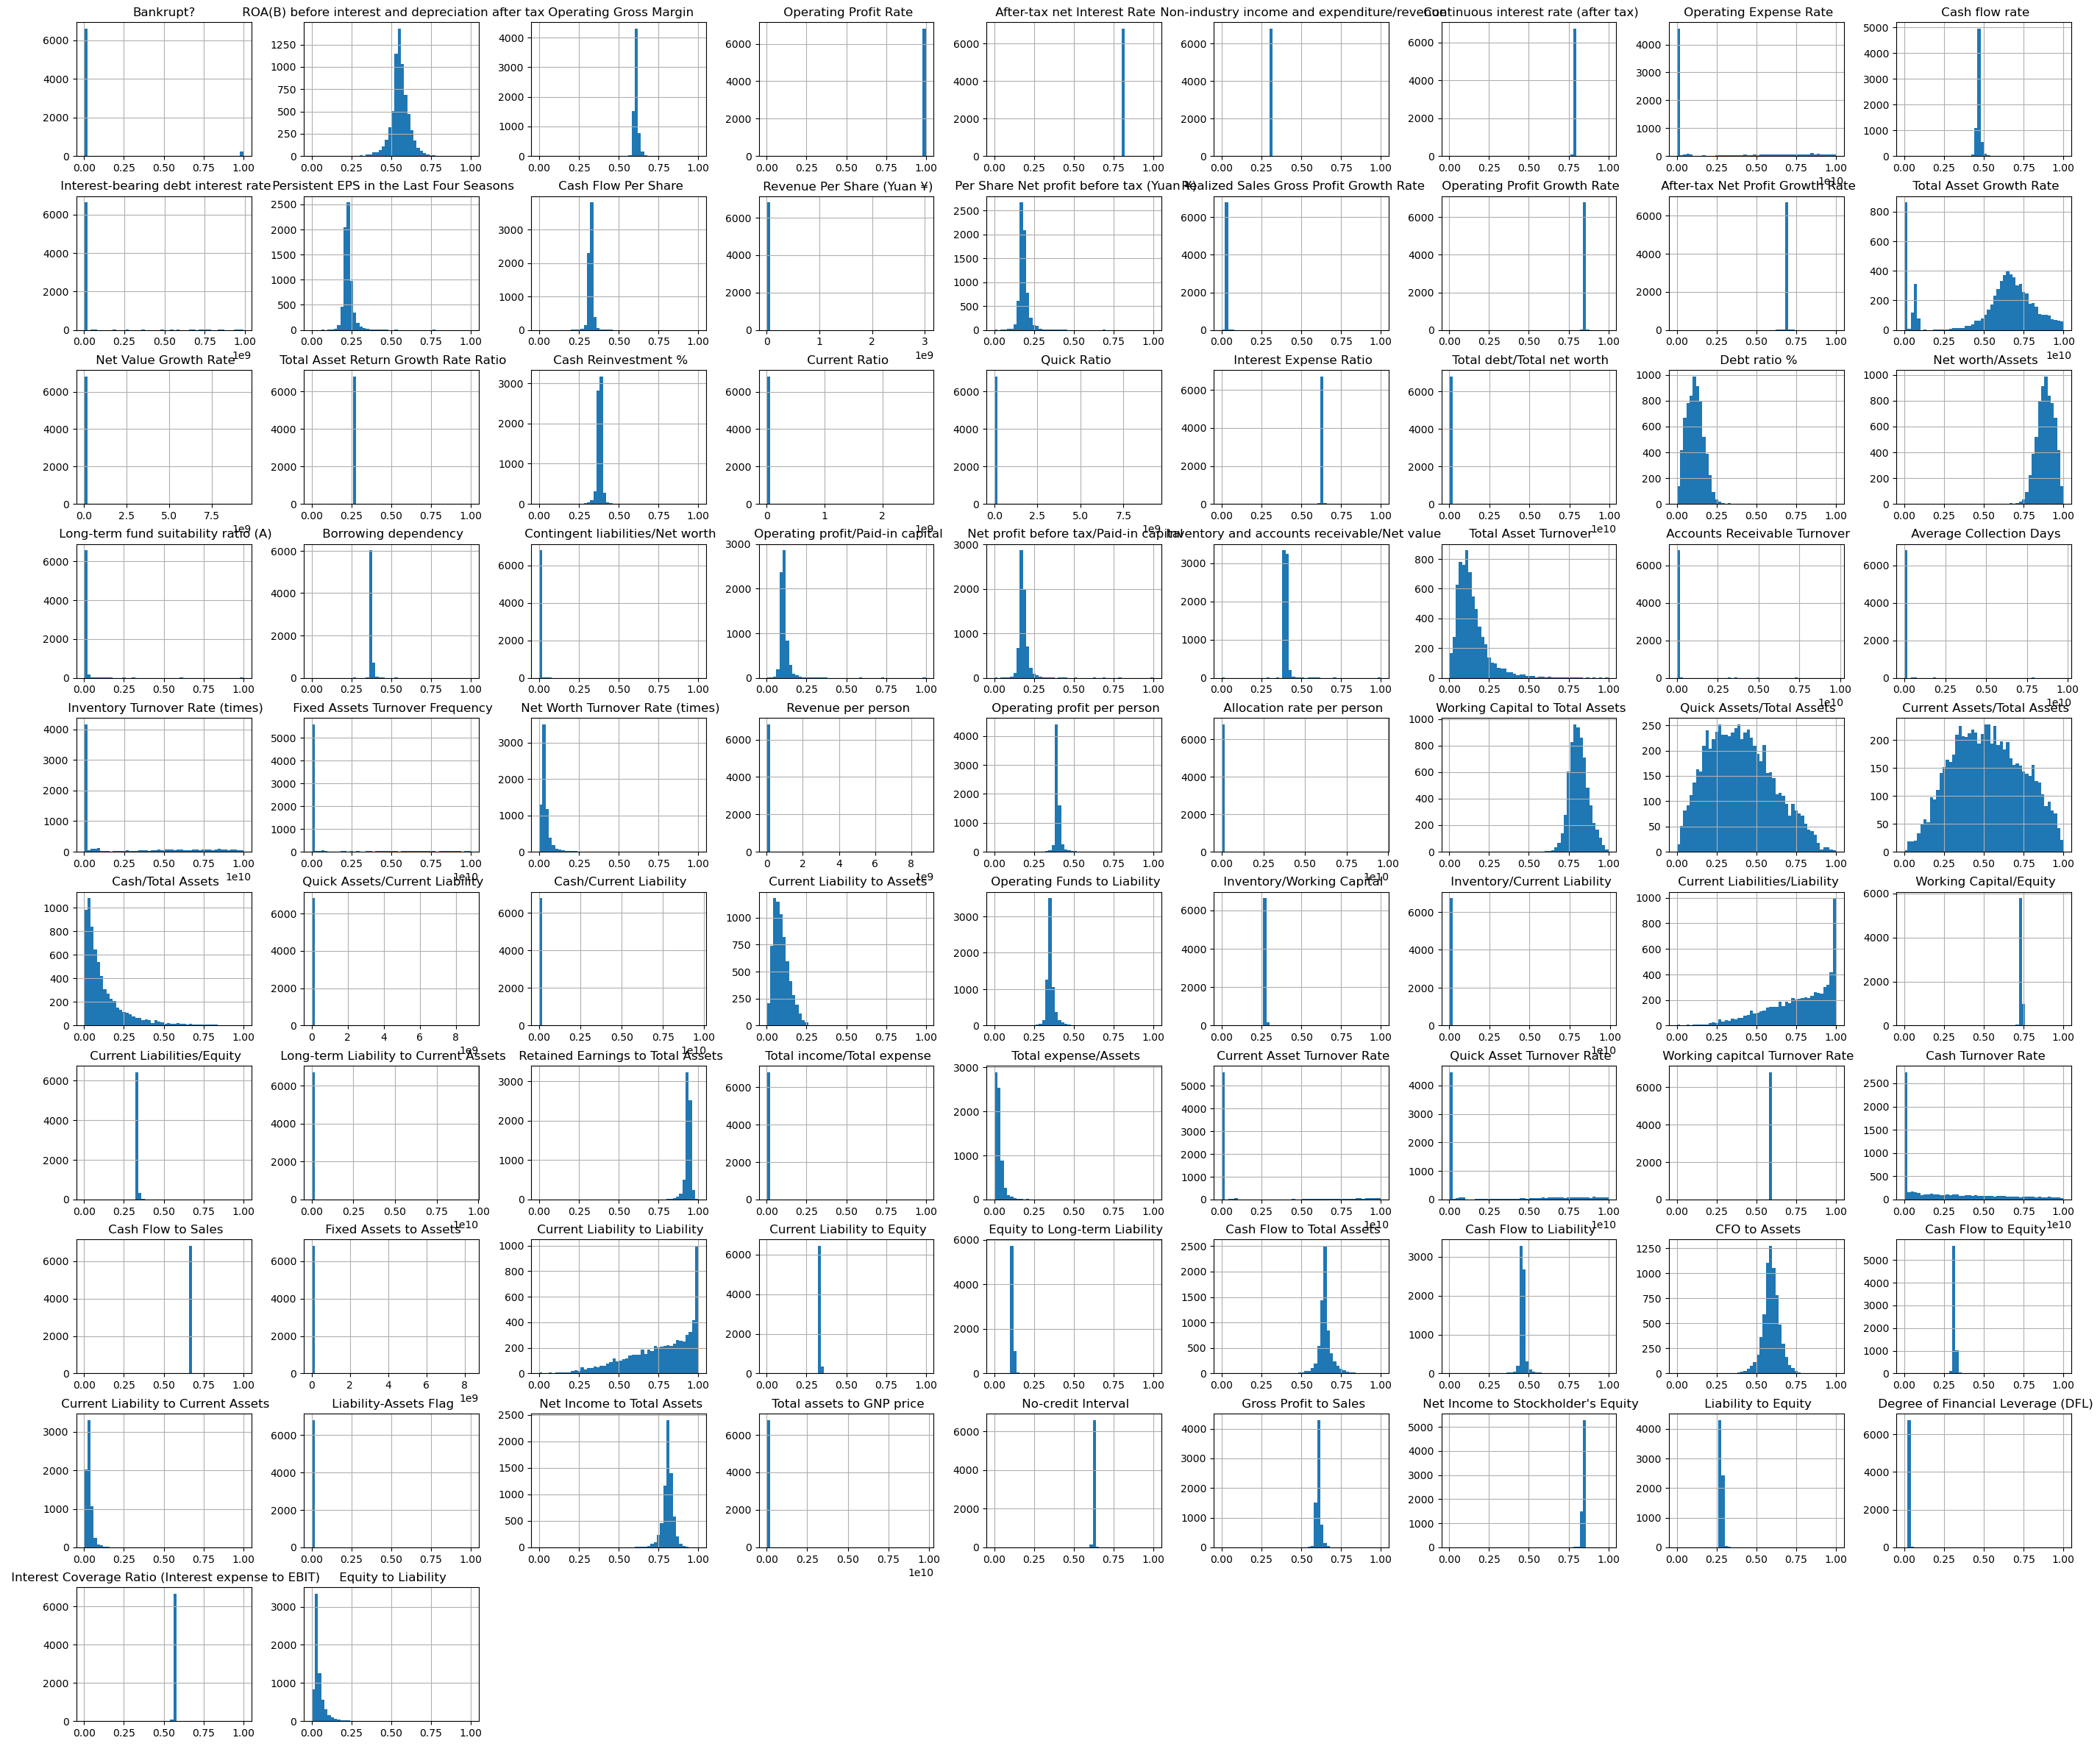

In [36]:
new_df.hist(figsize = (35,30), bins = 50)
plt.show()

Correlation Heat Map - Spearman

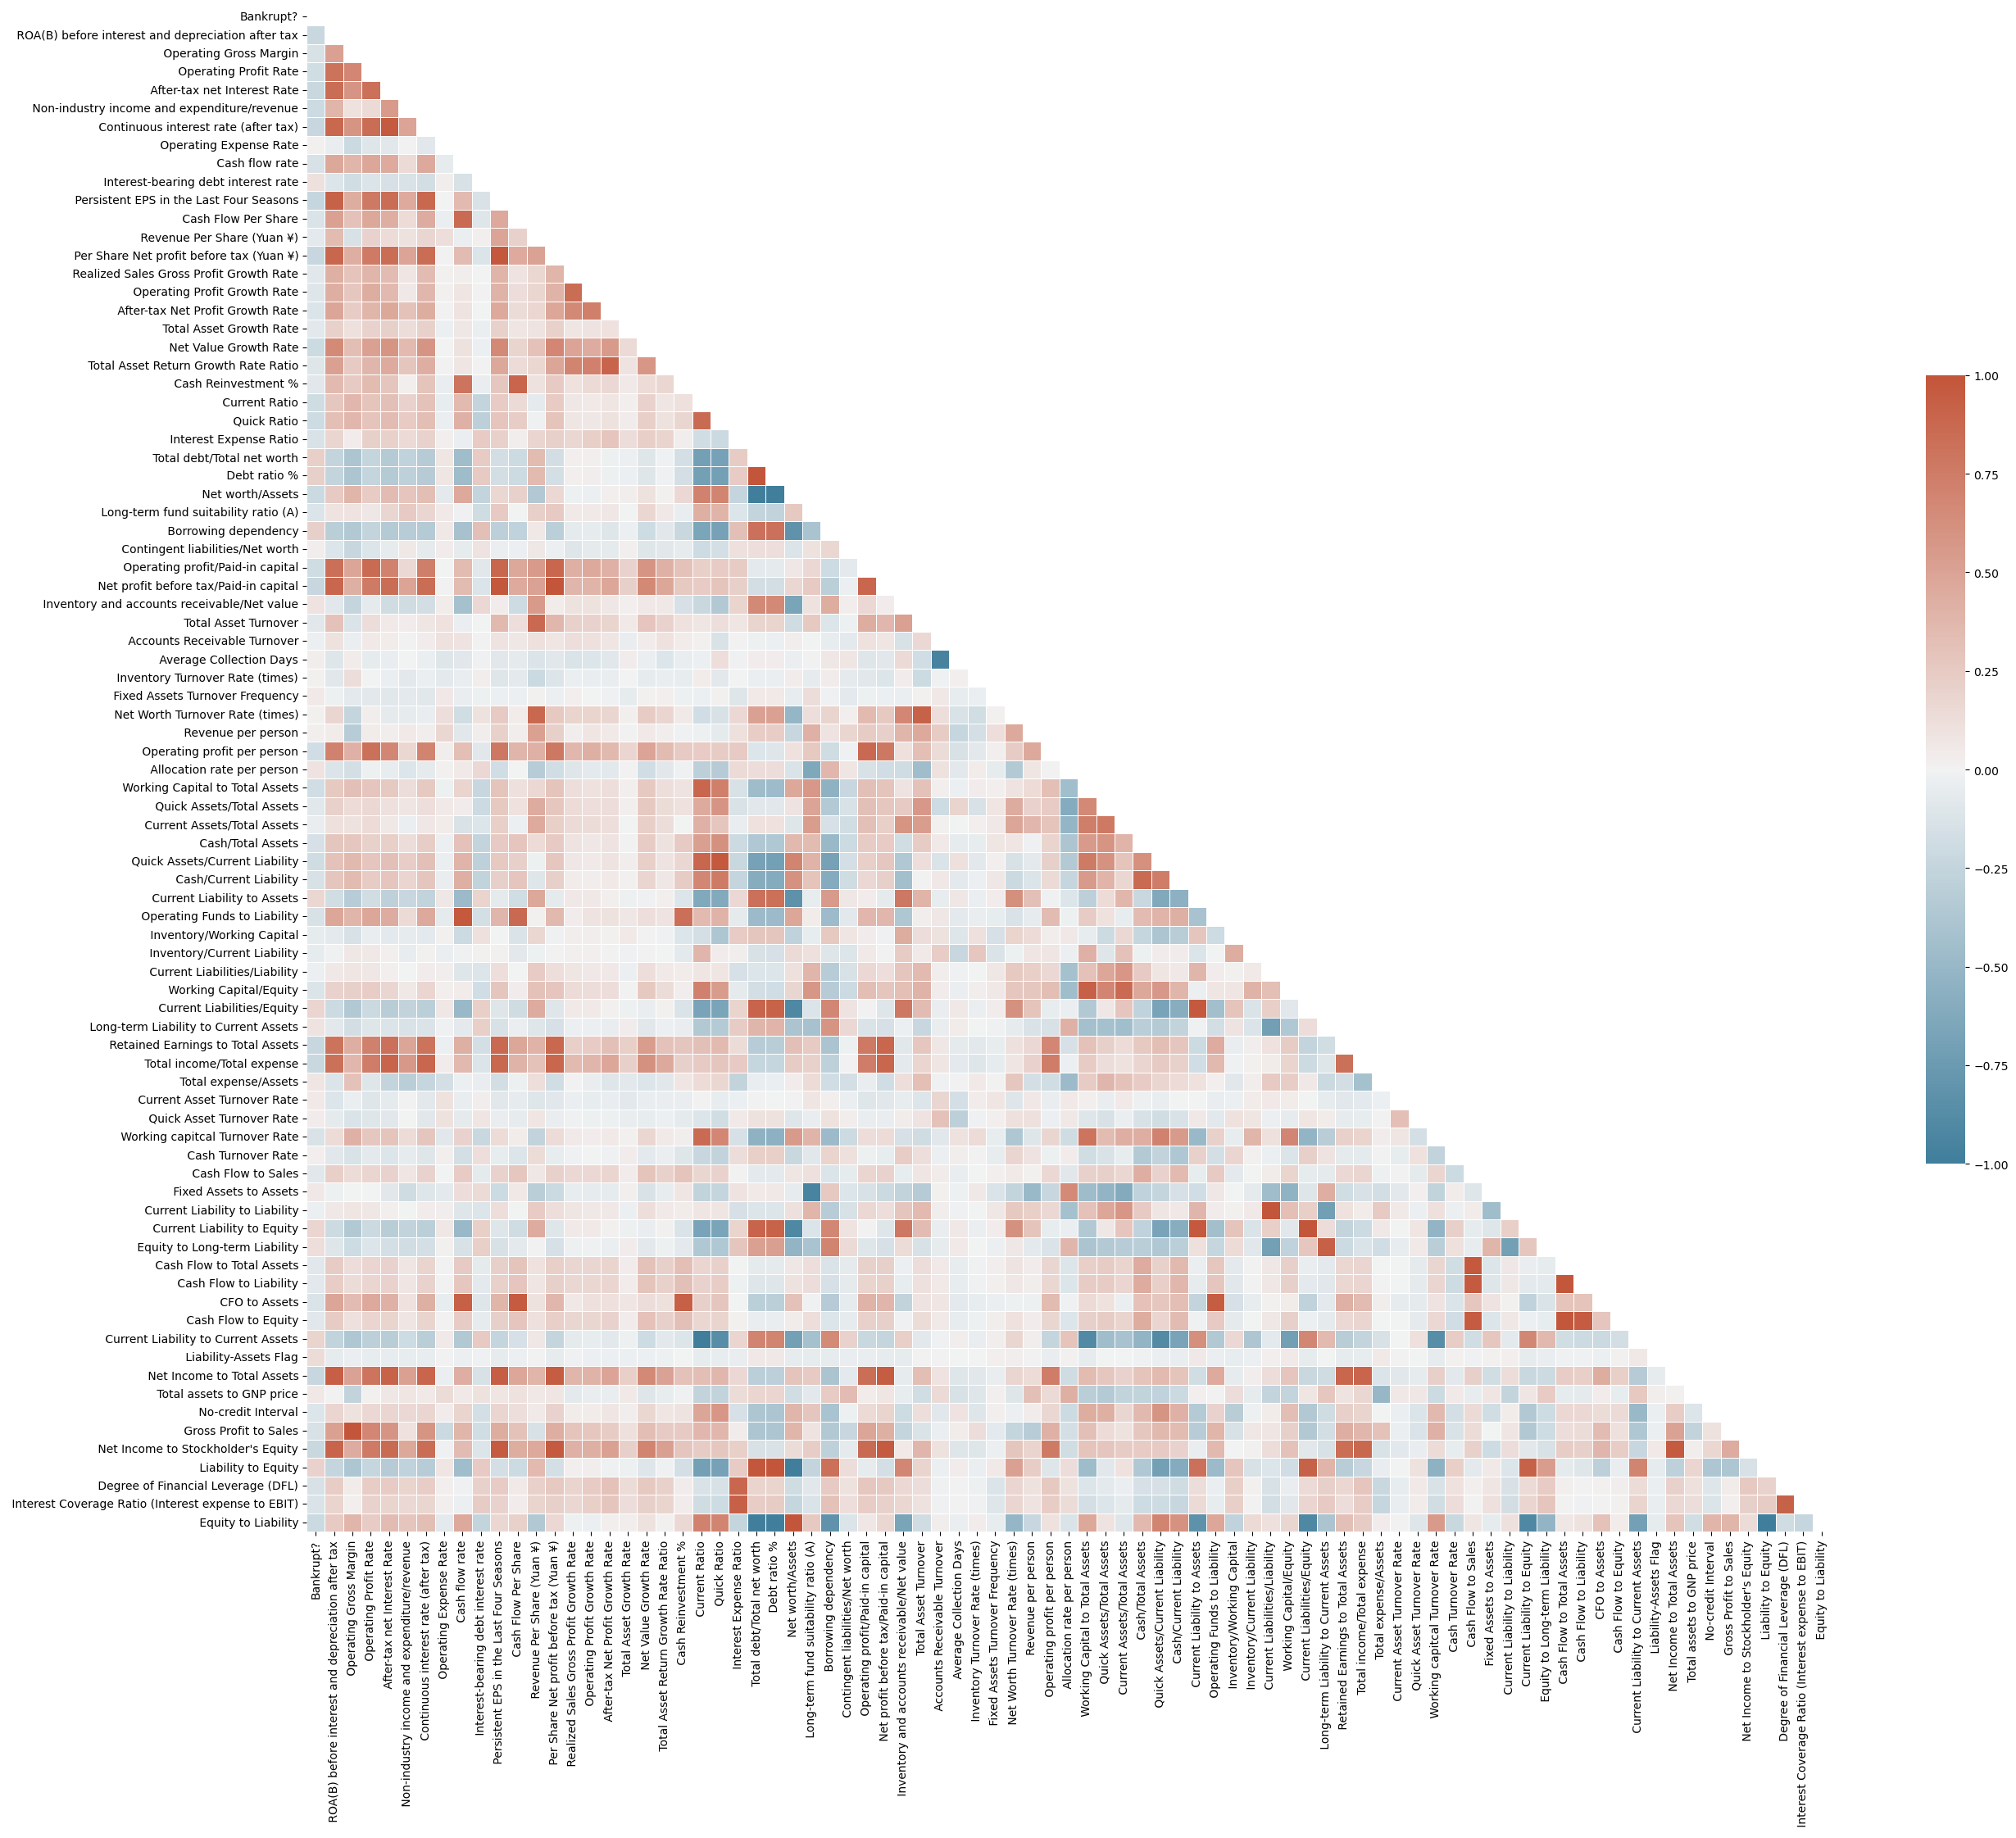

In [37]:
f, ax = plt.subplots(figsize=(30, 25))
mat = new_df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [38]:
# import mpld3

# f, ax = plt.subplots(figsize=(30, 25))
# mat = new_df.corr('spearman')
# mask = np.triu(np.ones_like(mat, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# # Convert the plot to an interactive HTML
# html_plot = mpld3.fig_to_html(f)

# # Save the HTML plot to a file or display it
# with open("heatmap.html", "w") as f:
#     f.write(html_plot)


Statistical Testing:

Hypothesis Testing to check the association categorical feature with target variable.

Null Hypothesis (H0):
There is no association between the "Bankrupt?" and "Liability-Assets Flag"

Alternative Hypothesis (Ha):
There is an association between the "Bankrupt?" and "Liability-Assets Flag"

Let's fix significance level, alpha = 0.05

In [39]:
import scipy.stats as stats

contingency_table = pd.crosstab(new_df['Bankrupt?'], new_df[' Liability-Assets Flag'])

# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
# print("Expected frequencies table:")
# print(expected)

Chi-square test statistic: 110.13807127769104
P-value: 9.139776609482457e-26
Degrees of freedom: 1


The P Val is extremly small and it is almost 0.00 thats obviously smaller than the alpha,
so we are rejecting the null hypothesis in favor of "Ha".

So we can conclude that there is a strong association between Liability-Assets Flag and Bankruptcy.

### Lets test correlation using pearson rank for numerical features.

In [40]:
# Null Hypothesis (H0): There is no significant linear relationship between 'Total Asset Growth Rate' and 'Net Value Growth Rate'.
# Alternative Hypothesis (Ha): There is a significant linear relationship between 'Total Asset Growth Rate' and 'Net Value Growth Rate'.

# significance level = 0.05

numerical_var_1 = new_df[' Total Asset Growth Rate']
numerical_var_2 = new_df[' Net Value Growth Rate']
corr_coeff, p_value = stats.pearsonr(numerical_var_1, numerical_var_2)
print("Correlation Test results:")
print("Correlation coefficient:", corr_coeff)
print("P-value:", p_value)

Correlation Test results:
Correlation coefficient: -0.00868835687036177
P-value: 0.4731627838770081


Let's remove the highly correlated features.

In [41]:
data = new_df.drop([' Continuous interest rate (after tax)',' After-tax net Interest Rate',
 ' Operating Profit Rate', ' After-tax net Interest Rate', ' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital', ' Net worth/Assets', ' Liability to Equity',
 ' Current Liability to Equity', ' Working capitcal Turnover Rate', ' Net Income to Total Assets'], axis= 1)

In [42]:
data.columns

Index(['Bankrupt?', ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover'

### Let's Scale & Split

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ([' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Operating profit/Paid-in capital',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Operating profit per person', ' Allocation rate per person',
       ' Working Capital to Total Assets', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Inventory/Working Capital', ' Inventory/Current Liability',
       ' Current Liabilities/Liability', ' Working Capital/Equity',
       ' Current Liabilities/Equity', ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Cash Turnover Rate',
       ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Equity to Long-term Liability',
       ' Cash Flow to Total Assets', ' Cash Flow to Liability',
       ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets',
       ' Total assets to GNP price', ' No-credit Interval',
       ' Gross Profit to Sales', " Net Income to Stockholder's Equity",
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'])

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [44]:
data.head()

Bankrupt?   ROA(B) before interest and depreciation after tax  \
0          1                                      -2.4003610043    
1          1                                      -0.5984496917    
2          1                                      -1.3199095998    
3          1                                      -1.5563398347    
4          1                                      -0.5080498959    

    Operating Gross Margin   Non-industry income and expenditure/revenue  \
0            -0.3833337037                                 -0.0874785355   
1             0.1350679230                                 -0.0059567872   
2            -0.3837593208                                 -0.1422377657   
3            -1.4414178120                                 -0.0244913467   
4            -0.5412376474                                 -0.0132536873   

    Operating Expense Rate   Cash flow rate  \
0            -0.6163336831    -0.5452563140   
1            -0.6163336831    -0.3266315040   
2            -0.6163336831    -0.5230983941   
3            -0.6163336831    -0.1013100782   
4             1.8207722424    -0.2750281705   

    Interest-bearing debt interest rate   Cash Flow Per Share  \
0                         -0.1519207018         -0.6710811713   
1                         -0.1519207018         -0.3035333842   
2                         -0.1519207018         -0.9301722343   
3                         -0.1519207018         -0.1026875990   
4                         -0.1519207018         -0.2452881065   

    Revenue Per Share (Yuan ¥)   Per Share Net profit before tax (Yuan ¥)  \
0                -0.0256974048                              -1.3751499621   
1                -0.0256974047                              -0.4353117133   
2                -0.0256974050                              -1.2525623644   
3                -0.0256974049                              -1.0777615307   
4                -0.0256974046                              -0.4807145273   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                             -0.0252994197                   0.0199967985   
1                             -0.0271298374                   0.0100345766   
2                              0.0291630309                   0.0106046280   
3                             -0.0299533123                   0.0023700665   
4                             -0.0258266951                   0.0258756583   

    After-tax Net Profit Growth Rate   Total Asset Growth Rate  \
0                      -0.0120311640             -0.1822590617   
1                       0.0394731726              0.2077315983   
2                       0.0228528903              0.6115272373   
3                      -0.0026409856             -0.2167715094   
4                       0.0397606270              0.0006569116   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0           -0.0137205263                          -0.1191184831   
1           -0.0137205263                           0.0278472166   
2           -0.0137205263                          -0.0065953486   
3           -0.0137205263                          -0.0909675340   
4           -0.0137205263                           0.1007654342   

    Cash Reinvestment %   Current Ratio   Quick Ratio  \
0         -0.7692966707   -0.0121107633 -0.0342367440   
1         -0.1431167997   -0.0121107632 -0.0342367440   
2         -0.5190942402   -0.0121107630 -0.0342367440   
3          0.2121976034   -0.0121107632 -0.0342367440   
4          0.0006260688   -0.0121107632 -0.0342367440   

    Interest Expense Ratio   Total debt/Total net worth   Debt ratio %  \
0            -0.0925203080                -0.0262261250   1.7508450138   
1             0.3720934857                -0.0262261251   1.0757267271   
2            -0.1209834645                -0.0262261250   1.7497235549   
3            -0.0678664605                -0.0262261251   0.7101311100   
4           

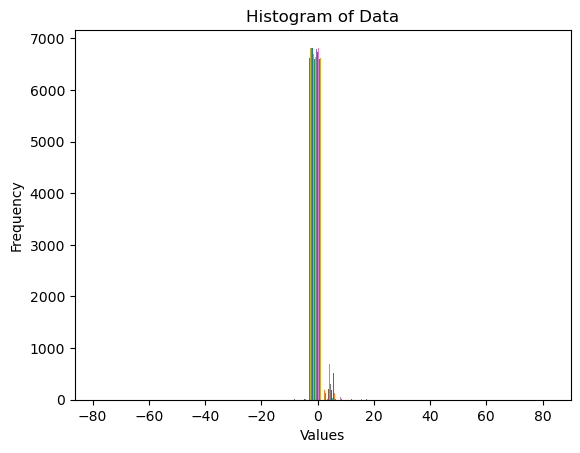

In [45]:
plt.hist(data, bins=30)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()

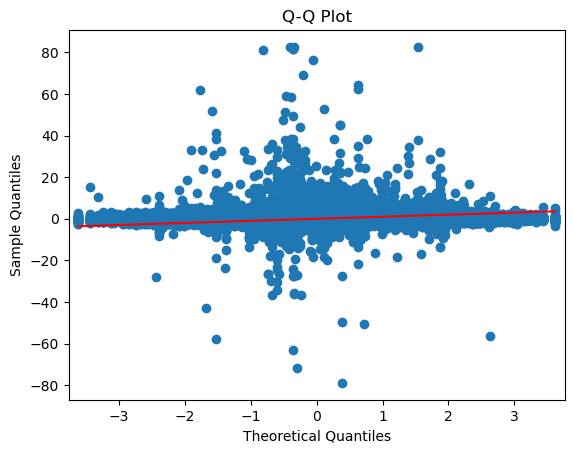

In [46]:
import statsmodels.api as sm

sm.qqplot(data, line='s')
plt.title("Q-Q Plot")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4773, 72)
(2046, 72)
(4773,)
(2046,)


### Statistical Test:

H0 : Mean_of_Train = Mean_of_test

H1 : Mean_of_Train <> Mean_of_test

In [49]:
from scipy import stats

stats.ttest_ind(X_train,X_test)[1]< 0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False])

## Model Building

#### Logistic Regression

In [50]:
def metrics(model,test,pred):
    print(model)
    print('Confusion Matrix : ')
    print(confusion_matrix(test,pred))
    accuracy_logreg = accuracy_score(test, pred)
    print("Logistic Regression Accuracy:", accuracy_logreg)
    print('Classification Report : ')
    print(classification_report(test,pred))
    print('Cohen Kappa Score : ', cohen_kappa_score(test,pred))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_logreg_train = logreg_model.predict(X_train)
y_pred_logreg_test = logreg_model.predict(X_test)

# Evaluate the model on the training data
print("Logistic Regression - Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_logreg_train))
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_logreg_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_logreg_train))

print('----------------')
print('----------------')

# Evaluate the model on the test data
print("Logistic Regression - Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))


Logistic Regression - Train Data
Confusion Matrix:
[[4049  575]
 [  13  136]]
Logistic Regression Accuracy: 0.8768070395977373
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4624
           1       0.19      0.91      0.32       149

    accuracy                           0.88      4773
   macro avg       0.59      0.89      0.62      4773
weighted avg       0.97      0.88      0.91      4773

----------------
----------------
Logistic Regression - Test Data
Confusion Matrix:
[[1735  240]
 [  16   55]]
Logistic Regression Accuracy: 0.8748778103616813
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1975
           1       0.19      0.77      0.30        71

    accuracy                           0.87      2046
   macro avg       0.59      0.83      0.62      2046
weighted avg       0.96      0.87      0.91      2046



Wow, Train data is doing well but Test data is not, Lets try other Model.

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

# Evaluate the model on the training data
print("Decision Tree - Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_dt_train))
print("Decision Tree Accuracy:", accuracy_score(y_train, y_pred_dt_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_dt_train))

print('----------------')
print('----------------')

# Evaluate the model on the test data
print("Decision Tree - Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_test))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_test))


Decision Tree - Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
Decision Tree Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
Decision Tree - Test Data
Confusion Matrix:
[[1934   41]
 [  57   14]]
Decision Tree Accuracy: 0.9521016617790812
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1975
           1       0.25      0.20      0.22        71

    accuracy                           0.95      2046
   macro avg       0.61      0.59      0.60      2046
weighted avg       0.95      0.95      0.95      2046



This over fits the Train Data

### Hyperparameter Tuning for Decision Tree Model.


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],              # Try different values for max_depth
    'min_samples_split': [2, 5, 10],             # Try different values for min_samples_split
    'min_samples_leaf': [1, 2, 4],               # Try different values for min_samples_leaf
    'criterion': ['gini', 'entropy']             # Try different splitting criteria
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training data
best_dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', **best_params)
best_dt_model.fit(X_train, y_train)

# Predict on the training and test data using the best model
y_pred_dt_train = best_dt_model.predict(X_train)
y_pred_dt_test = best_dt_model.predict(X_test)

# Evaluate the best model on the training data
print("Decision Tree - Best Model Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_dt_train))
print("Decision Tree Accuracy:", accuracy_score(y_train, y_pred_dt_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_dt_train))

print('----------------')
print('----------------')

# Evaluate the best model on the test data
print("Decision Tree - Best Model Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_test))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_test))


Decision Tree - Best Model Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
Decision Tree Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
Decision Tree - Best Model Test Data
Confusion Matrix:
[[1942   33]
 [  53   18]]
Decision Tree Accuracy: 0.9579667644183774
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1975
           1       0.35      0.25      0.30        71

    accuracy                           0.96      2046
   macro avg       0.66      0.62      0.64      2046
weighted avg       0.95      0.96      0.95      2046



### Still the Overfitting issue exists

Let's go for bagging and boosting

#### RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate the model on the training data
print("Random Forest - Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf_train))
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_rf_train))

print('----------------')
print('----------------')

# Evaluate the model on the test data
print("Random Forest - Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_test))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_test))


Random Forest - Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
Random Forest Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
Random Forest - Test Data
Confusion Matrix:
[[1972    3]
 [  64    7]]
Random Forest Accuracy: 0.9672531769305963
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1975
           1       0.70      0.10      0.17        71

    accuracy                           0.97      2046
   macro avg       0.83      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



In [55]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],          # Try different numbers of trees
    'max_depth': [None, 5, 10],               # Try different values for max_depth
    'min_samples_split': [2, 5, 10],          # Try different values for min_samples_split
    'min_samples_leaf': [1, 2, 4],            # Try different values for min_samples_leaf
    'criterion': ['gini', 'entropy']          # Try different splitting criteria
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training data
best_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)
best_rf_model.fit(X_train, y_train)

# Predict on the training and test data using the best model
y_pred_rf_train = best_rf_model.predict(X_train)
y_pred_rf_test = best_rf_model.predict(X_test)

# Evaluate the best model on the training data
print("Random Forest - Best Model Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf_train))
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_rf_train))

print('----------------')
print('----------------')

# Evaluate the best model on the test data
print("Random Forest - Best Model Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_test))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_test))


Random Forest - Best Model Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
Random Forest Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
Random Forest - Best Model Test Data
Confusion Matrix:
[[1973    2]
 [  64    7]]
Random Forest Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1975
           1       0.78      0.10      0.17        71

    accuracy                           0.97      2046
   macro avg       0.87      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



In [56]:
import xgboost as xgb

# Create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

# Evaluate the model on the training data
print("XGBoost - Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_xgb_train))
print("XGBoost Accuracy:", accuracy_score(y_train, y_pred_xgb_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_xgb_train))

print('----------------')
print('----------------')

# Evaluate the model on the test data
print("XGBoost - Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_test))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_test))


XGBoost - Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
XGBoost Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
XGBoost - Test Data
Confusion Matrix:
[[1950   25]
 [  49   22]]
XGBoost Accuracy: 0.9638318670576735
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1975
           1       0.47      0.31      0.37        71

    accuracy                           0.96      2046
   macro avg       0.72      0.65      0.68      2046
weighted avg       0.96      0.96      0.96      2046



In [57]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier model
catboost_model = CatBoostClassifier(random_state=42, class_weights=[1, sum(y_train==0)/sum(y_train==1)])

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_catboost_train = catboost_model.predict(X_train)
y_pred_catboost_test = catboost_model.predict(X_test)

# Evaluate the model on the training data
print("CatBoost - Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_catboost_train))
print("CatBoost Accuracy:", accuracy_score(y_train, y_pred_catboost_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_catboost_train))

print('----------------')
print('----------------')

# Evaluate the model on the test data
print("CatBoost - Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost_test))
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost_test))


Learning rate set to 0.020081
0:	learn: 0.6747914	total: 142ms	remaining: 2m 22s
1:	learn: 0.6582056	total: 190ms	remaining: 1m 34s
2:	learn: 0.6392189	total: 211ms	remaining: 1m 10s
3:	learn: 0.6274957	total: 225ms	remaining: 56.1s
4:	learn: 0.6111864	total: 237ms	remaining: 47.1s
5:	learn: 0.5930279	total: 248ms	remaining: 41s
6:	learn: 0.5775666	total: 259ms	remaining: 36.7s
7:	learn: 0.5609599	total: 269ms	remaining: 33.3s
8:	learn: 0.5518891	total: 279ms	remaining: 30.7s
9:	learn: 0.5391049	total: 289ms	remaining: 28.6s
10:	learn: 0.5285639	total: 299ms	remaining: 26.9s
11:	learn: 0.5132729	total: 311ms	remaining: 25.6s
12:	learn: 0.5032775	total: 322ms	remaining: 24.4s
13:	learn: 0.4945649	total: 331ms	remaining: 23.3s
14:	learn: 0.4819154	total: 343ms	remaining: 22.5s
15:	learn: 0.4724815	total: 353ms	remaining: 21.7s
16:	learn: 0.4621226	total: 364ms	remaining: 21.1s
17:	learn: 0.4531647	total: 375ms	remaining: 20.5s
18:	learn: 0.4470391	total: 385ms	remaining: 19.9s
19:	learn:

In [58]:

# Create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],         # Try different numbers of trees
    'max_depth': [3, 5, 7],                  # Try different values for max_depth
    'learning_rate': [0.01, 0.1, 0.2],       # Try different learning rates
    'subsample': [0.8, 1.0],                 # Try different subsample ratios
    'colsample_bytree': [0.8, 1.0],          # Try different feature subsample ratios
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training data
best_xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1), **best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the training and test data using the best model
y_pred_xgb_train = best_xgb_model.predict(X_train)
y_pred_xgb_test = best_xgb_model.predict(X_test)

# Evaluate the best model on the training data
print("XGBoost - Best Model Train Data")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_xgb_train))
print("XGBoost Accuracy:", accuracy_score(y_train, y_pred_xgb_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_xgb_train))

print('----------------')
print('----------------')

# Evaluate the best model on the test data
print("XGBoost - Best Model Test Data")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_test))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_test))


XGBoost - Best Model Train Data
Confusion Matrix:
[[4624    0]
 [   0  149]]
XGBoost Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00       149

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773

----------------
----------------
XGBoost - Best Model Test Data
Confusion Matrix:
[[1956   19]
 [  47   24]]
XGBoost Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1975
           1       0.56      0.34      0.42        71

    accuracy                           0.97      2046
   macro avg       0.77      0.66      0.70      2046
weighted avg       0.96      0.97      0.96      2046



In [59]:


# Define the hyperparameters and their potential values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# Create GridSearchCV to find the best hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred_logreg_test_best = best_logreg_model.predict(X_test)

# Evaluate the best model on the test data
print("Best Logistic Regression Model - Test Data")
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test_best))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg_test_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_test_best))


Best Logistic Regression Model - Test Data
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Confusion Matrix:
[[1730  245]
 [  16   55]]
Logistic Regression Accuracy: 0.8724340175953079
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1975
           1       0.18      0.77      0.30        71

    accuracy                           0.87      2046
   macro avg       0.59      0.83      0.61      2046
weighted avg       0.96      0.87      0.91      2046



In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
}

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# Create GridSearchCV to find the best hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

# Use the best model to make predictions on the training data
y_pred_logreg_train_best = best_logreg_model.predict(X_train)

# Evaluate the best model on the training data
print("Best Logistic Regression Model - Train Data")
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_logreg_train_best))
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_logreg_train_best))
print("Classification Report:")
print(classification_report(y_train, y_pred_logreg_train_best))

print('----------------')
print('----------------')

# Use the best model to make predictions on the test data
y_pred_logreg_test_best = best_logreg_model.predict(X_test)

# Evaluate the best model on the test data
print("Best Logistic Regression Model - Test Data")
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test_best))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg_test_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_test_best))


Best Logistic Regression Model - Train Data
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Confusion Matrix:
[[4048  576]
 [  12  137]]
Logistic Regression Accuracy: 0.8768070395977373
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4624
           1       0.19      0.92      0.32       149

    accuracy                           0.88      4773
   macro avg       0.59      0.90      0.63      4773
weighted avg       0.97      0.88      0.91      4773

----------------
----------------
Best Logistic Regression Model - Test Data
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Confusion Matrix:
[[1730  245]
 [  16   55]]
Logistic Regression Accuracy: 0.8724340175953079
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1975
           1       0.18      0.77      0.30        71

    accuracy                           0.87      2046


### Let's analyze the results and make some conclusions:

Based on the results and metrics provided for each model, let's analyze and compare them to determine the best suitable model:

From the above results, we can make the following observations:

##### Logistic Regression:

Logistic Regression achieves a relatively high accuracy on both the train and test data, indicating a good overall fit to the data.
However, the precision and F1-score for class 1 (bankruptcy) are low, suggesting that the model may have difficulty correctly identifying instances of bankruptcy.
The model performs well in identifying non-bankruptcy instances (class 0) but struggles with bankruptcy instances due to low recall.

##### Decision Tree:

The Decision Tree model shows perfect accuracy on the train data, which is a sign of potential overfitting since it fails to generalize well to the test data.
The low precision, recall, and F1-score for class 1 on the test data further confirm the overfitting issue, as the model is unable to generalize to new bankruptcy instances.

##### Random Forest:

Random Forest exhibits a high accuracy on both train and test data, indicating good generalization capability.
However, the model struggles with correctly identifying bankruptcy instances (class 1) as indicated by low precision, recall, and F1-score for class 1 on the test data.

##### XGBoost:

XGBoost achieves a high accuracy on both train and test data, indicating good generalization ability.
The precision, recall, and F1-score for class 1 are better than the previous models, but they are still relatively low, indicating that the model has difficulty identifying bankruptcy instances.

##### CatBoost:

CatBoost performs well on both train and test data with high accuracy and good generalization ability.
The precision, recall, and F1-score for class 1 (bankruptcy) are better than the other models, suggesting that CatBoost has better capabilities in correctly identifying bankruptcy instances.

##### My Suggestion & Conclusion
Based on the overall metrics, CatBoost seems to be the best suitable model among the ones I have tried. It provides a better balance of precision, recall, and F1-score for class 1 (bankruptcy) on the test data while maintaining a high overall accuracy. It is important to consider the specific business context and requirements when choosing the final model, but CatBoost seems to be the most promising based on the provided results.